# Importing packages

['../../Datasets/SumRuleCyl-allInOne/N2000D30.0ac4.0-bug-chainSize.parquet.brotli', '../../Datasets/SumRuleCyl-allInOne/N1000D15.0ac2.0-bug-chainSize.parquet.brotli', '../../Datasets/SumRuleCyl-allInOne/N1000D15.0ac2.0-bug-chainSize-acf.parquet.brotli', '../../Datasets/SumRuleCyl-allInOne/N2000D25.0ac2.0-bug-chainSize-acf.parquet.brotli', '../../Datasets/SumRuleCyl-allInOne/N2000D25.0ac4.0-bug-chainSize-acf.parquet.brotli', '../../Datasets/SumRuleCyl-allInOne/N2000D20.0ac2.0-bug-chainSize.parquet.brotli', '../../Datasets/SumRuleCyl-allInOne/N500D10.0ac0.6-bug-chainSize-acf.parquet.brotli', '../../Datasets/SumRuleCyl-allInOne/N2000D25.0ac2.0-bug-chainSize.parquet.brotli', '../../Datasets/SumRuleCyl-allInOne/N2000D25.0ac4.0-bug-chainSize.parquet.brotli', '../../Datasets/SumRuleCyl-allInOne/N2000D30.0ac6.0-bug-chainSize-acf.parquet.brotli', '../../Datasets/SumRuleCyl-allInOne/N2000D20.0ac2.0-bug-chainSize-acf.parquet.brotli', '../../Datasets/SumRuleCyl-allInOne/N2000D30.0ac6.0-bug-chainSi

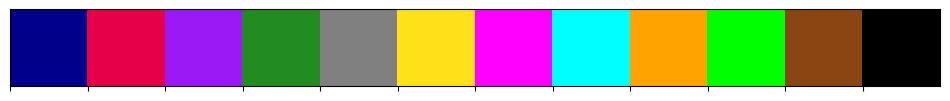

In [2]:
# Importing necessary packages:

from glob import glob
import numpy as np
import pandas as pd

from cmcrameri import cm as crameri

import warnings
warnings.filterwarnings("ignore")
import itertools

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from polyphys.visualize import plotter
from polyphys.visualize.plotter import PROJECT_DETAILS as PD
from polyphys.visualize.plotter import ATTRIBUTE_LABELS as AL
from polyphys.visualize.plotter import AMIRHSI_COLORS as AC
from polyphys.visualize.plotter import DUTCH_FEILD_COLORS as DF_colors
from polyphys.visualize.plotter import SIZE_MEASURES_LABELS as SML

from polyphys.visualize import tuner
from polyphys.manage.parser import SumRuleCyl
from polyphys.manage import organizer
from polyphys.analyze import measurer
from polyphys.manage import utilizer

#import imageio
from matplotlib.image import NonUniformImage
from matplotlib.patches import Circle, Rectangle
from matplotlib import cm

# Project details
project = 'SumRuleCyl'

# loading databases:
allInOne_db = '../../Datasets/'+project+'-allInOne/' # relative
space_dbs = glob(allInOne_db + PD[project]['space_pat'])
print(space_dbs)
sns.palplot(AC)

#flar_cmap = mpl.colors.ListedColormap(sns.cm._flare_lut)
#flare_cmap_cut = tuner.truncated_colormap(flar_cmap,  min_value=.1, max_value=1, ncolors=1000)
#mpl.cm.register_cmap("flare_cmap_cut", flare_cmap_cut)


TITLE_STYLES = {
    'TransFociCub': {
        'title': lambda s: fr"$N_m={s.nmon_small}, N_M={s.nmon_large}, a_M={s.dmon_large}, a_c={s.dcrowd}$",
        'short': lambda s: fr"$a_M={s.dmon_large}$",
        'universe': lambda s: fr"$N_m={s.nmon_small}, N_M={s.s}, a_c={s.dcrowd}$"
    },
    'TransFociCyl': {
        'title': lambda s: fr"$N_m={s.nmon_small}, N_M={s.nmon_large}, D={s.dcyl}, a_M={s.dmon_large}, a_c={s.dcrowd}$",
        'short': lambda s: fr"$a_M={s.dmon_large}$",
        'universe': lambda s: fr"$N_m={s.nmon_small}, N_M={s.nmon_large}, D={s.dcyl}, a_c={s.dcrowd}$"
    },
    'SumRuleCyl': {
        'title': lambda s: fr"$N={s.nmon}, D={s.dcyl}, a_c={s.dcrowd}$",
        'short': lambda s: "",
        'universe': lambda s: ""
    },
    'HnsCub': {
        'title': lambda s: fr"$N={s.nmon}, N_{{hns}}={s.nhns}, a_c={s.dcrowd},$",
        'short': lambda s: fr"$N_{{hns}}={s.nhns}, a_c={s.dcrowd}$",
        'universe': lambda s: fr"$N={s.nmon}$"
    },
    'HnsCyl': {
        'title': lambda s: fr"$N={s.nmon}, D={s.dcyl}, N_{{hns}}={s.nhns}, a_c={s.dcrowd}$",
        'short': lambda s: fr"$D={s.dcyl}, N_{{hns}}={s.nhns}, a_c={s.dcrowd}$",
        'universe': lambda s: fr"$N={s.nmon}$"     
    }
}

# Confinement rate ($L/D$) and finite-size effects ($Z/L$)

In [ ]:
sumrule_db = '../../Datasets/SumRuleCyl-allInOne/*equilProps-whole.csv'
sumrule_db = glob(sumrule_db)
print(sumrule_db)
equil = pd.read_csv(sumrule_db[0])
print(equil.columns)

In [ ]:
cols = ['nmon','dcyl','dcrowd','lcyl','phi_c_bulk_round']
mean_round = lambda x: np.round(np.mean(x),3)
table_1 = equil.groupby(cols)[cols+['fsdMon-mean']].agg({'fsdMon-mean': mean_round})
table_1.reset_index(inplace=True)
table_1['lcyl/fsdMon'] = np.round(table_1['lcyl'] / table_1['fsdMon-mean'],3)
sort_cols = cols + ['lcyl/fsdMon']
table_1.sort_values(by=sort_cols,inplace=True)
table_1.to_csv('table_1.csv',index=False)

In [ ]:
cols = ['nmon','dcyl','dcrowd']
mean_round = lambda x: np.round(np.mean(x),3)
table_2 = equil.groupby(cols)[['phi_c_bulk_round']].count()
table_2.reset_index(inplace=True)
#table_2['lcyl/fsdMon'] = np.round(table_1['lcyl'] / table_1['fsdMon-mean'],3)
#sort_cols = cols + ['lcyl/fsdMon']
table_2.sort_values(by=cols,inplace=True)
table_2.to_csv('table_2.csv',index=False)

# Auto-correlation functions

- Note: In a given space, ensAvg groups differs in their values of bulk volume fraction of crowders (column name: phi_c_bulk)

### Theoretical background:

Below, all the several definitions of autocorrelation function (acf) in the literature are listed. Assuming $A(t)$ is a discrete time-varying property of interest and is collected every $M$ timesteps in a molecular dynamics simulation with the time step $\Delta t$ and time unit $\hat{t}$. First, we define the mean (or average) and unbiased variance of $A(t)$ as what follows

$$\langle A\rangle=\frac{1}{t_{max}}\sum_{t=1}^{t_{max}}A(t)$$
$$\sigma^2_A=\langle A^2 \rangle-\langle A\rangle^2=\frac{1}{t_{max}-1}\sum_{t=1}^{t_{max}}(A(t)-\langle A\rangle)^2$$

where $t_{max}$ is the total number of collected cofigurations or timesteps, or simply the size of $A(t)$, implying the total number of simulated timesteps is $t_{max}\times M$. Given this definition, the acf has been defined in the following ways in the literature:

1. Allen and Tildesley define the *non-normalized* acf in "Computer simulation of liquids - 2017" as

$$c_{AA}(h) = \frac{1}{h_{max}}\sum_{h_0=1}^{h_{max}}A(h_0)A(h_0+h)$$

where $h_{max}=\frac{t_{max}-1}{h}$

2. *1989 - Murat M Greet GS - Structure of a Grafted Polymer Brush A Molecular Dynamics Simulation* defines the acf in "Structure of a Grafted Polymer Brush A Molecular Dynamics Simulation - 1989" as

$$c_{AA}(h) =\frac{\langle (A(h)-\langle A \rangle)(A(0)-\langle A \rangle)\rangle}{\sigma^2_A}=\frac{\langle A(h)A(0)\rangle-\langle A \rangle \langle A(0) \rangle}{\sigma^2_A}$$

See the rest of this artciel to see how correlation time is calculated. See the rest of this artciel to see how correlation time is calculated.

3. In *1989 - Grest GS Kremer K Witten TA et el - Relaxation of Self-Entangled Many-Arm Star Polymers, 1987 - Grest GS Kremer K Witten TA - Structure of Many-Arm Star Polymers A Molecular Dynamics Simulation, and 1977 - Kranbuehl DE Verdier PH - Relaxation of the aspherical shapes of random-coil polymer chains*, the acf is

$$c_{AA}(h) =\frac{\langle A(h)A(0)\rangle-\langle A \rangle^2}{\sigma^2_A}$$

where the average is performed over the initial time steps $h=h_0=0$ taken every $K$ timesteps. Kranbuehl and Verdier runs the whole simulation several times the relaxation time of the end-to-end length.

4. In *1978 - Rapaport DC - Molecular dynamics simulation of polymer chains with excluded volum, and 1979 - Bishop M Ceperley D Frisch HL - Molecular dynamics of polymeric systems* the afc is given by

$$c_{AA}(h) =\frac{\langle A(h)A(h_0+h)\rangle-\langle A(h_0) \rangle^2}{\sigma^2_A(h_0)}$$

where

$$\sigma^2_A(h_0)=\langle A(h_0)^2 \rangle-\langle A(h_0)\rangle^2$$

The averaging should be done over ensembles; however, in practice, the ensemble average is replaced by the time average provided that the timesteps or time interval between successvie $h_0$ values are sufficently lagre so the configurations are uncorrelated.

5. *1981 - Bruns W Bansal R - Molecular dynamics study of a single polymer chain in solution* defines the afc as

$$c_{\vec{A}\vec{A}}(h) = \frac{\sum_{h_0=1}^{t_{max}-h}\vec{A}(h_0).\vec{A}(h_0+h)}{\sum_{h_0=1}^{t_{max}-h}\vec{A}^2(h_0)}$$

where $\vec{A}$ is a vector quantity and $h_0$ is summed over $1,1+p,1+2p,\dots$ instead of $h_0=1,2,3,\dots,t_{max}-h$. For a scalar quantity, this definition is used:

$$c_{AA}(h) = \frac{(t_{max}-h)\sum_{h_0=1}^{t_{max}-h}A(h_0)A(h_0+h)-\sum_{h_0=1}^{t_{max}-h}A(h_0)\sum_{h_0=1}^{t_{max}-h}A(h_0+h)}{\sqrt{(t_{max}-h)\sum_{h_0=1}^{t_{max}-h}A^2(h_0)-[\sum_{h_0=1}^{t_{max}-h}A^2(h_0)]^2}-\sqrt{(t_{max}-h)\sum_{h_0=1}^{t_{max}-h}A^2(h_0+h)-[\sum_{h_0=1}^{t_{max}-h}A^2(h_0+h)]^2}}=
\frac{\langle A(h_0)A(h_0+h)\rangle-\langle A(h_0)\rangle\langle A(h_0+h)\rangle}{\sqrt{\langle A^2(h_0)\rangle-\langle A(h_0)\rangle^2}-\sqrt{\langle A^2(h_0+h)\rangle-\langle A(h_0+h)\rangle^2}}$$

6. *Brockwell PJ Davis RA - 2016 - Introduction to Time Series and Forecasting* defines the afc in the following way

$$c_{AA}(h) = \frac{cov_{A}(h)}{\sigma_A^2} = \frac{1}{\sigma_A^2}\frac{1}{t_{max}}\sum_{h_0=1}^{t_{max}-h} [A(h_0+h)-\langle A\rangle][A(h_0)-\langle A\rangle]$$





### How to run this Notebook:

1. Check ((spaces_to_read**
2. Check **group** and **species**.
3. check **database**.
4. delete extra **physical** properties based on the preoject.
5. check **nlags** and **ticks**.
6. check **parser** and **spaces_title**.

### Grouping and filtering

Since the datasets we work with are large, it is a good idea to
- define some filters to ease subsetting the dataframes.
- define distinguishable colors for the volume fraction of crowders as the changing parameter that defines different ensAvg groups in a space
- round the value of this changing parameter.

In [ ]:
# read data
acf = []
acf_space_dbs = [space_db for space_db in space_dbs if
                 space_db.endswith('acf.parquet.brotli')]
# Define lag times
dumping_freq = {'TransFociCyl': 'bdump', 'TransFociCub': 'bdump',
                'SumRuleCyl': 'bdump', 'HnsCub': 'ndump', 'HnsCyl': 'ndump'
                }

for space_db in acf_space_dbs:
    space_acf = pd.read_parquet(space_db)
    ensembles = space_acf['ensemble_long'].unique()
    space_acf.rename(columns={'time':'time_dump_dt'}, inplace=True)
    
    space_acf['lag_time'] = 0
    space_acf['lag_index'] = 0
    space_acf['space_title'] = ''
    space_acf['space_title_short'] = ''
    space_acf['universe'] = ''
    
    for ens in ensembles:
        s_info = PD[project]['parser'](ens, 'ensemble_long', PD[project]['geometry'], PD[project]['group'], PD[project]['topology'], ispath=False)
        if project not in TITLE_STYLES.keys():
            raise ValueError(f"Project: '{project}' is not defined.")

        style = TITLE_STYLES[project]
        cond = space_acf['ensemble_long']==ens
        space_acf.loc[cond,'space_title'] = style['title'](s_info)
        space_acf.loc[cond,'space_title_short'] = style['short'](s_info)
        space_acf.loc[cond,'universe'] = style['universe'](s_info)
        
        n_lags = len(space_acf.loc[cond,'time_dump_dt'])
        bdump = getattr(s_info, dumping_freq[project])
        space_acf.loc[cond,'lag_time'] = space_acf.loc[cond,'time_dump_dt'] * bdump
        space_acf.loc[cond,'lag_index'] = np.arange(0,n_lags,dtype=np.int_)
    
    acf.append(space_acf)

# Concatenate and reset DataFrame
acf = pd.concat(acf, axis=0, ignore_index=True)
acf.reset_index(inplace=True, drop=True)

# Obtain and sort unique spaces
spaces = acf['space'].drop_duplicates().sort_values()
spaces = sorted(spaces, key=organizer.sort_by_alphanumeric)

# Handle rounding of specific projects
if project == 'HnsCyl':
    replacements = {0.09: 0.08, 0.15: 0.16, 0.21: 0.2, 0.31: 0.32}
    acf['phi_c_bulk_round'].replace(replacements, inplace=True)
    acf = acf.loc[~acf['phi_c_bulk_round'].isin([0.06, 0.18]), :]
elif project == 'TransFociCyl':
    acf = acf.loc[~acf['phi_c_bulk_round'].isin([0.025, 0.05, 0.075, 0.125, 0.175]), :]

print('Unique phi_c_bulk:', sorted(acf['phi_c_bulk_round'].unique()))

# Reset index and drop unnecessary columns
acf.reset_index(inplace=True, drop=True)
cols_to_drop = [col for col in acf.columns if col.endswith(('sem', 'var')) or col == 'phi_c_bulk']
acf.drop(columns=cols_to_drop, inplace=True)

# Define list of unique physical properties and rename columns
ext = '-acf-mean'
properties = sorted(prop.split(ext)[0] for prop in acf.columns if ext in prop)
acf.columns = acf.columns.str.replace(ext, '').str.replace('-mean', '')

print(acf.columns)

# Re-sort unique spaces
spaces = acf['space'].drop_duplicates().sort_values()
spaces = sorted(spaces, key=organizer.sort_by_alphanumeric)

## per properties per space phi_c as hue:

In [ ]:
%%time 
# ~90s
save_to = '../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'
plot_params = {
    'talk': {
        'height': 4,
        'aspect': 1*1.618, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1,
        'bbox_to_anchor':(1.02, 1.05),
    },
    'paper': {
        'height': 4,
        'aspect': 1*1.618, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.6,
        'bbox_to_anchor':(1.02, 1),
    }
}
rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'xtick.top': False,
    'xtick.direction': 'in',
    'ytick.right': False,
    'ytick.direction': 'in',
    'font_family': font_family
}
color_palette = 'viridis'
facet_kws = {'sharey': False, 'sharex': 'row', 'legend_out': True}
legend_kws = {'frameon': False, 'markerscale': 2}
fig_title_kws = {'x': 0.8, 'y': 1.02, 'ha': 'center'}

hue_attr = 'phi_c_bulk_round'
x_prop = 'lag_index' # 'time'

for plot_context in ['talk', 'paper']:
    for x_axis_style in ['normal']:
        for space in spaces:
            chainsize_space = acf.loc[acf['space']==space]
            for y_prop in properties:
                sns.reset_defaults()
                with sns.axes_style('ticks', rc=rc_params):
                    with sns.plotting_context(
                    plot_context,
                    font_scale=plot_params[plot_context]['font_scale']
                    ):
                        acf_plot = sns.lineplot(
                            data=chainsize_space,
                            x=x_prop,
                            y=y_prop,
                            hue=hue_attr,
                            legend='full',
                            palette=color_palette,
                            errorbar=None,
                            alpha=0.7
                        )
                        acf_plot.axhline(y=0, c='black', ls='--')
                        if plot_context == 'talk':
                            acf_plot.set_title(
                                chainsize_space['space_title'].values[0],
                            )
                        acf_plot.set_xlabel(AL[x_prop])
                        acf_plot.set_ylabel(SML[y_prop]['acf'])
                        acf_plot.legend(title=AL[hue_attr],
                                        loc='upper left',
                                        bbox_to_anchor=plot_params[plot_context]['bbox_to_anchor'],
                                        **legend_kws
                                        )
                        acf_plot.set(ylim=(-0.12,1.1))
                        if x_axis_style == 'log':
                            acf_plot.set(xscale="log")
                        output = "-".join(
                            ["ACF", plot_context, x_axis_style, y_prop, project, space]
                        )
                        plt.savefig(save_to+output+"."+ext, bbox_inches='tight')
                        plt.close()


## per properties fixed phi_c spaces as hue: No important

In [ ]:
# filter for the chosen phi_c
phi_c_to_keep = [0.3]
acf_phi_c = acf.loc[acf['phi_c_bulk_round'].isin(phi_c_to_keep),:].copy()
acf_phi_c.reset_index(inplace=True)
# sorting
group_by_cols = {
    'SumRuleCyl': ['nmon','dcyl','dcrowd'],
    'TransFociCub': ['nmon_large'],
    'TransFociCyl': ['nmon_large'],
    'HnsCub': ['nhns','dcrowd'],
}
acf_phi_c.sort_values(group_by_cols[project], inplace=True)

In [ ]:
save_to = '../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'
plot_params = {
    'talk': {
        'height': 4,
        'aspect': 1.618, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.2,
        'bbox_to_anchor':(1.02, 1.05),
    },
    'paper': {
        'height': 4,
        'aspect': 1.618, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.5,
        'bbox_to_anchor':(1.02, 1.05),
    }
}
rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'xtick.top': True,
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.direction': 'in',
    'font_family': font_family
}
color_palette = AC[:len(spaces)] # dmon_large_c_palette
facet_kws = {'sharey': False, 'sharex': 'row', 'legend_out': True}
legend_kws = {'frameon': False, 'markerscale': 3}
fig_title_kws = {'x': 0.8, 'y': 1.02, 'ha': 'center'}

hue_attr = 'space_title'
x_prop = 'lag_index' # 'time'
t_idx_nrom_cutoff = 0.5

for plot_context in ['paper']: #,'talk']:
    for y_prop in properties:
        y_prop_norm = y_prop #+ '-norm-last_nth_mean'
        height = plot_params[plot_context]['height'] 
        aspect = plot_params[plot_context]['aspect']
        full = acf_phi_c.loc[:,[x_prop,hue_attr,y_prop,'universe']]
        sns.reset_defaults()
        with sns.axes_style('ticks', rc=rc_params):
            with sns.plotting_context(
            plot_context,
            font_scale=plot_params[plot_context]['font_scale']
            ):
                fig, ax = plt.subplots(figsize=(height*aspect,height))
                # full range:
                tseries_grid = sns.lineplot(
                    data=full,
                    x=x_prop,
                    y=y_prop,
                    hue=hue_attr,
                    legend='full',
                    errorbar=None,
                    alpha=0.75,
                    ax=ax,
                    lw=1.5,
                    palette=color_palette
                )
                tseries_grid.set_xlabel(AL[x_prop])
                tseries_grid.set_ylabel(SML[y_prop]['acf'])
                # legend:
                leg = tseries_grid.legend(
                    title=(fr'System ($\phi_c={phi_c_to_keep[0]}$)'),
                    loc='upper left',
                    bbox_to_anchor=plot_params[plot_context]['bbox_to_anchor'],
                    **legend_kws)
                for handler in leg.legendHandles:
                    handler.set_linewidth(3)
                output = "-".join(
                    ["ACF", y_prop, x_prop, hue_attr,
                    project, f'phi_c{phi_c_to_keep[0]}'])
                fig.savefig(save_to+output+ "." + ext, bbox_inches='tight')
                plt.close()


## per property fixed phi_c space as hue nmon as col: Not important

In [ ]:
save_to = '../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'
plot_params = {
    'talk'a: {
        'height': 4,
        'aspect': 1.618, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.2,
        'bbox_to_anchor':(1.02, 1.05),
    },
    'paper': {
        'height': 4,
        'aspect': 1.618, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.5,
        'bbox_to_anchor':(1.02, 1.05),
    }
}
rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'xtick.top': True,
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.direction': 'in',
    'font_family': font_family
}
color_palette = AC[:len(spaces)] # dmon_large_c_palette
facet_kws = {'sharey': False, 'sharex': 'row', 'legend_out': True}
legend_kws = {'frameon': False, 'markerscale': 3}
fig_title_kws = {'x': 0.8, 'y': 1.02, 'ha': 'center'}

hue_attr = 'space_title'
x_prop = 'lag_index' # 'time'

for plot_context in ['paper']: #,'talk']:
    for y_prop in properties:
        y_prop_norm = y_prop #+ '-norm-last_nth_mean'
        height = plot_params[plot_context]['height'] 
        aspect = plot_params[plot_context]['aspect']
        full = acf_phi_c.loc[:,[x_prop,hue_attr,y_prop,'universe']]
        sns.reset_defaults()
        with sns.axes_style('ticks', rc=rc_params):
            with sns.plotting_context(
            plot_context,
            font_scale=plot_params[plot_context]['font_scale']
            ):
                #fig, ax = plt.subplots(figsize=(height*aspect,height))
                # full range:
                tseries_grid = sns.relplot(
                    data=acf_phi_c,
                    x=x_prop,
                    y=y_prop,
                    col='nmon',
                    hue=hue_attr,
                    legend='full',
                    #errorbar=None,
                    kind='line',
                    alpha=0.75,
                    #ax=ax,
                    lw=1.5,
                    palette=color_palette
                )
                tseries_grid.set_xlabels(AL[x_prop])
                tseries_grid.set_ylabels(SML[y_prop]['acf'])
                # legend:
                #leg = tseries_grid.legend(
                #    title=(fr'System ($\phi_c={phi_c_to_keep[0]}$)'),
                #    loc='upper left',
                #    bbox_to_anchor=plot_params[plot_context]['bbox_to_anchor'],
                #    **legend_kws)
                #for handler in leg.legendHandles:
                #    handler.set_linewidth(3)
                output = "-".join(
                    ["Time_evolution-xLog", y_prop, x_prop, hue_attr,
                    project, f'phi_c{phi_c_to_keep[0]}'])
                tseries_grid.savefig(save_to+output+ "." + ext, bbox_inches='tight')
                plt.close()


# Size measures

## Grouping and filtering

Since the datasets we work with are large, it is a good idea to
- define some filters to ease subsetting the dataframes.
- define distinguishable colors for the volume fraction of crowders as the changing parameter that defines different ensAvg groups in a space
- round the value of this changing parameter.

In [ ]:
%%time 
# ~40s
# import data:
chainsize_space_dbs = [space_db for space_db in space_dbs if
                 space_db.endswith('chainSize.parquet.brotli')
                      ]
chainsize = [pd.read_parquet(space_db) for space_db in chainsize_space_dbs]
chainsize = pd.concat(chainsize,axis=0, ignore_index=True)
chainsize.reset_index(inplace=True,drop=True)
print(chainsize.columns)
# a sorted list of unique spaces in the dataset
spaces = chainsize.loc[:,'space'].drop_duplicates().sort_values()
spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
# rounding phi_c as facgtors of 0.025:
# add rounded phi_crds to the dataset
divisor = 0.025
round_to = 3
chainsize['phi_c_bulk_round'] = chainsize['phi_c_bulk'].apply(
    utilizer.round_up_nearest, args=[divisor, round_to]
)
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
chainsize = chainsize.loc[~chainsize['phi_c_bulk_round'].isin(phi_c_to_drop),:]
chainsize.reset_index(inplace=True, drop=True)
# droping some of the columns
cols_to_drop = [c for c in chainsize.columns if (c.endswith('sem') | c.endswith('var'))] + ['phi_c_bulk']
chainsize.drop(columns=cols_to_drop,inplace=True)
# add rounded phi_crds to the dataset
# Define a list of unique physical properties:
ext = '-mean'
properties = [
    prop.split(ext)[0] for prop in chainsize.columns if prop.endswith(ext)
]
properties.sort()
# change the name of cols after fining properties based on "mean" in their name
new_columns = [prop.split(ext)[0] for prop in chainsize.columns]
chainsize.columns = new_columns
# space titles
chainsize['space_title'] = ''
space_title_style = ''
space_title_style_short = ''
universe_title_style = ''
for space in spaces:
    s_info = PD[project]['parser'](
        space,
        'space',
        PD[project]['geometry'],
        PD[project]['group'],
        PD[project]['topology'],
        ispath=False
    )
    if project not in TITLE_STYLES.keys():
            raise ValueError(f"Project: '{project}' is not defined.")

    style = TITLE_STYLES[project]
    cond = chainsize['space']==space
    chainsize.loc[cond,'space_title'] = style['title'](s_info)
    chainsize.loc[cond,'space_title_short'] = style['short'](s_info)
    chainsize.loc[cond,'universe'] = style['universe'](s_info)

In [ ]:
ensemble_long = 'N2000epsilon5.0r15.5lz379.5sig4.0nc0dt0.005bdump1000adump5000'
cond = chainsize['ensemble_long'] == ensemble_long
chainsize_ens_avg = chainsize.loc[cond,['t_index','fsdTMon']]
for roll in [100, 200,500, 1000, 2000, 5000, 10000, 50000, 100000, 150000]:
    chainsize_ens_avg[f'fsdTMon_{roll}'] = chainsize_ens_avg['fsdTMon'].rolling(roll).mean()

In [ ]:
cols = chainsize_ens_avg.columns.to_list()
cols.remove('t_index')
chainsize_ens_avg_melt = chainsize_ens_avg.melt(
    id_vars=['t_index'],
    value_vars=cols
)


In [ ]:
cols

In [ ]:
chainsize_ens_avg_melt.dropna(inplace=True)

In [ ]:
ax = sns.lineplot(
   data=chainsize_ens_avg_melt.loc[-3000:,:],
   x='t_index',
   y='value',
   hue='variable',
   hue_order=cols,
   palette='viridis_r',
   alpha=0.5 
)
#ax.set(xscale='log')

## Time series of physical properties

### per property per space phi_c as hue

In [ ]:
%%time 
# ~10min
save_to = '../../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'
plot_params = {
    'talk': {
        'height': 4,
        'aspect': 1.5*1.618, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1,
        'bbox_to_anchor':(1.02, 1.1),
    },
    'paper': {
        'height': 4,
        'aspect': 1.5*1.618, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.6,
        'bbox_to_anchor':(1.02, 1),
    }
}
rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'xtick.top': True,
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.direction': 'in',
    'font_family': font_family
}
color_palette = 'viridis'
facet_kws = {'sharey': False, 'sharex': 'row', 'legend_out': True}
legend_kws = {'frameon': False, 'markerscale': 2}
fig_title_kws = {'x': 0.8, 'y': 1.02, 'ha': 'center'}

hue_attr = 'phi_c_bulk_round'
x_prop = 't_index' # 'time'

for plot_context in ['paper', 'talk']:
    for x_axis_style in ['normal', 'log']:
        for space in spaces:
            chainsize_space = chainsize.loc[chainsize['space']==space]
            for y_prop in properties:
                sns.reset_defaults()
                with sns.axes_style('ticks', rc=rc_params):
                    with sns.plotting_context(
                    plot_context,
                    font_scale=plot_params[plot_context]['font_scale']
                    ):
                        tseries_grid = sns.lineplot(
                            data=chainsize_space,
                            x=x_prop,
                            y=y_prop,
                            hue=hue_attr,
                            legend='full',
                            palette=color_palette,
                            errorbar=None,
                            alpha=0.7
                        )
                        if plot_context == 'talk':
                            tseries_grid.set_title(
                                chainsize_space['space_title'].values[0],
                            )
                        tseries_grid.set_xlabel(AL[x_prop])
                        tseries_grid.set_ylabel(SML[y_prop]['symbol'])
                        tseries_grid.legend(title=AL[hue_attr],
                                            loc='upper left',
                                            bbox_to_anchor=plot_params[plot_context]['bbox_to_anchor'],
                                            **legend_kws
                                        )
                        if x_axis_style == 'log':
                            tseries_grid.set(xscale="log")
                        output = "-".join(
                            ["Time_evolution", plot_context, x_axis_style, y_prop, project, space]
                        )
                        plt.savefig(save_to+output+"."+ext, bbox_inches='tight')
                        plt.close()

### per property per space selected phi_c as hue

In [ ]:
%%time 
# ~6min
save_to = '../../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'
plot_params = {
    'talk': {
        'height': 4,
        'aspect': 1.5*1.618, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1,
        'bbox_to_anchor':(1.02, 1.1),
    },
    'paper': {
        'height': 4,
        'aspect': 1.5*1.618, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.6,
        'bbox_to_anchor':(1.02, 1),
    }
}
rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'xtick.top': True,
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.direction': 'in',
    'font_family': font_family
}
color_palette = 'viridis'
facet_kws = {'sharey': False, 'sharex': 'row', 'legend_out': True}
legend_kws = {'frameon': False, 'markerscale': 2}
fig_title_kws = {'x': 0.8, 'y': 1.02, 'ha': 'center'}

hue_attr = 'phi_c_bulk_round'
x_prop = 't_index' # 'time'
phi_c_chosen = [0, 0.1, 0.2, 0.3, 0.4]

for plot_context in ['paper', 'talk']:
    for x_axis_style in ['normal', 'log']:
        for space in spaces:
            cond_phi_c = chainsize['phi_c_bulk_round'].isin(phi_c_chosen)
            cond_space = chainsize['space']==space 
            chainsize_space = chainsize.loc[cond_phi_c&cond_space]
            for y_prop in properties:
                sns.reset_defaults()
                with sns.axes_style('ticks', rc=rc_params):
                    with sns.plotting_context(
                    plot_context,
                    font_scale=plot_params[plot_context]['font_scale']
                    ):
                        tseries_grid = sns.lineplot(
                            data=chainsize_space,
                            x=x_prop,
                            y=y_prop,
                            hue=hue_attr,
                            legend='full',
                            palette=color_palette,
                            errorbar=None,
                            alpha=0.7
                        )
                        if plot_context == 'talk':
                            tseries_grid.set_title(
                                chainsize_space['space_title'].values[0],
                            )
                        tseries_grid.set_xlabel(AL[x_prop])
                        tseries_grid.set_ylabel(SML[y_prop]['symbol'])
                        tseries_grid.legend(title=AL[hue_attr],
                                            loc='upper left',
                                            bbox_to_anchor=plot_params[plot_context]['bbox_to_anchor'],
                                            **legend_kws
                                        )
                        if x_axis_style == 'log':
                            tseries_grid.set(xscale="log")
                        output = "-".join(
                            ["Time_evolution-chosen_phic", plot_context, x_axis_style, y_prop, project, space]
                        )
                        plt.savefig(save_to+output+"."+ext, bbox_inches='tight')
                        plt.close()

### per property selected space selected phi_c as hue

##### style 1

In [ ]:
%%time 
# ~6min
save_to = '../../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'
plot_params = {
    'talk': {
        'height': 4,
        'aspect': 1, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1,
        'bbox_to_anchor':(1.02, 1.1),
    },
    'paper': {
        'height': 5,
        'aspect': 1, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 2,
        'bbox_to_anchor':(0.72, 0.9),
    }
}
rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'xtick.top': False,
    'ytick.right': False,
    'font_family': font_family
}

facet_kws = {'sharey': False, 'sharex': True}#, 'legend_out': True}
legend_kws = {'ncol': 1, 'frameon': False}
fig_title_kws = {'x': 0.8, 'y': 1.02, 'ha': 'center'}
phi_c_chosen = [0, 0.1, 0.2, 0.3, 0.4]
cond_phi_c = chainsize['phi_c_bulk_round'].isin(phi_c_chosen)
spaces_chosen = [
    '$N=500, D=10.0, a_c=0.6$',
    '$N=500, D=10.0, a_c=1.0$',
    '$N=2000, D=30.0, a_c=4.0$',
    '$N=2000, D=30.0, a_c=6.0$'
    ]
cond_space = chainsize['space_title'].isin(spaces_chosen)

chainsize_chosen = chainsize.loc[cond_phi_c&cond_space]
col_attr = 'space_title'
col_order = spaces_chosen
color_palette = 'viridis_r'
hue_attr = 'phi_c_bulk_round'
x_prop = 't_index' # 'time'
for plot_context in ['paper']:
    for x_axis_style in ['log']:
        for y_prop in properties[1:2]:
            sns.reset_defaults()
            with sns.axes_style('ticks', rc=rc_params):
                with sns.plotting_context(
                plot_context,
                font_scale=plot_params[plot_context]['font_scale']
                ):
                    tseries_grid = sns.relplot(
                        data=chainsize_chosen,
                        x=x_prop,
                        y=y_prop,
                        col=col_attr,
                        col_order=col_order,
                        hue=hue_attr,
                        legend='full',
                        palette=color_palette,
                        kind='line',
                        errorbar=None,
                        aspect=plot_params[plot_context]['aspect'],
                        height=plot_params[plot_context]['height'],
                        facet_kws=facet_kws,
                        alpha=0.9
                    )
                    tseries_grid.set_titles("{col_name}")
                    tseries_grid.set_xlabels(AL[x_prop])
                    tseries_grid.set_ylabels(SML[y_prop]['symbol'])
                    tseries_grid.set(xscale="log")
                    #tseries_grid._legend.set_title(AL[hue_attr])
                    for legobj in tseries_grid._legend.legendHandles:
                        legobj.set_linewidth(3.0)
                    sns.move_legend(tseries_grid, title=AL[hue_attr],
                                    loc='upper left',
                                    bbox_to_anchor=plot_params[plot_context]['bbox_to_anchor'],
                                    **legend_kws
                    )
                    #tseries_grid.tight_layout(pad=0.1)
                    output = "-".join(
                        ["Time_evolution-chosen_spaces_phic-style1", plot_context, x_axis_style, y_prop, project]
                    )
                    tseries_grid.savefig(save_to+output+"."+ext, bbox_inches='tight')
                    plt.close()

##### style 2

In [ ]:
%%time 
# ~6min
save_to = '../../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'
plot_params = {
    'talk': {
        'height': 4,
        'aspect': 1, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1,
        'bbox_to_anchor':(1.02, 1.1),
    },
    'paper': {
        'height': 4,
        'aspect': 1.618, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 2,
        'bbox_to_anchor':(0.5, 0.5),
    }
}
rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'xtick.top': False,
    'ytick.right': False,
    'font_family': font_family
}
facet_kws = {'sharey': False, 'sharex': True}#, 'legend_out': True}
legend_kws = {'ncol': 2, 'frameon': False, 'markerscale': 2}
fig_title_kws = {'x': 0.8, 'y': 1.02, 'ha': 'center'}
phi_c_chosen = [0, 0.1, 0.2, 0.3, 0.4]
cond_phi_c = chainsize['phi_c_bulk_round'].isin(phi_c_chosen)
spaces_chosen = [
    '$N=500, D=10.0, a_c=0.6$',
    '$N=500, D=10.0, a_c=1.0$',
    '$N=2000, D=30.0, a_c=4.0$',
    '$N=2000, D=30.0, a_c=6.0$'
    ]
cond_space = chainsize['space_title'].isin(spaces_chosen)

chainsize_chosen = chainsize.loc[cond_phi_c&cond_space]
col_attr = 'space_title'
col_order = spaces_chosen
hue_attr = 'phi_c_bulk_round'
color_palette = 'viridis_r'
x_prop = 't_index' # 'time'
for plot_context in ['paper']:
    for x_axis_style in ['log']:
        for y_prop in properties[1:2]:
            sns.reset_defaults()
            with sns.axes_style('ticks', rc=rc_params):
                with sns.plotting_context(
                plot_context,
                font_scale=plot_params[plot_context]['font_scale']
                ):
                    tseries_grid = sns.relplot(
                        data=chainsize_chosen,
                        x=x_prop,
                        y=y_prop,
                        col=col_attr,
                        col_order=col_order,
                        col_wrap=2,
                        hue=hue_attr,
                        legend='full',
                        palette=color_palette,
                        kind='line',
                        errorbar=None,
                        aspect=plot_params[plot_context]['aspect'],
                        height=plot_params[plot_context]['height'],
                        facet_kws=facet_kws,
                        alpha=0.9
                    )
                    tseries_grid.set_titles("{col_name}")
                    tseries_grid.set_xlabels(AL[x_prop])
                    tseries_grid.set_ylabels(SML[y_prop]['symbol'])
                    tseries_grid.set(xscale="log")
                    #tseries_grid._legend.set_title(AL[hue_attr])
                    for legobj in tseries_grid._legend.legendHandles:
                        legobj.set_linewidth(3.0)
                    sns.move_legend(tseries_grid, title=AL[hue_attr],
                                    loc='upper left',
                                    bbox_to_anchor=plot_params[plot_context]['bbox_to_anchor'],
                                    **legend_kws
                    )
                    #tseries_grid.tight_layout(pad=0.1)
                    output = "-".join(
                        ["Time_evolution-chosen_spaces_phic-style2", plot_context, x_axis_style, y_prop, project]
                    )
                    tseries_grid.savefig(save_to+output+"."+ext, bbox_inches='tight')
                    plt.close()

### per property fixed phi_c time normalized with max space as hue

#### filter data for a given phi_c, normalizing time by its max

In [ ]:
# filter for the chosen phi_c
phi_c_to_keep = [0.4]
chainsize_phi_c = chainsize.loc[chainsize['phi_c_bulk_round'].isin(phi_c_to_keep),:].copy()
chainsize_phi_c.reset_index(inplace=True)
# Calculate the normalized 't_index' values using the custom function
chainsize_phi_c['t_idx_norm'] = chainsize_phi_c.groupby('ensemble_long')['t_index'].transform(lambda x: x / x.max())
chainsize_phi_c.sort_values(by=['ensemble_long', 't_index'], inplace=True)
#group_sizes = chainsize_phi_c.groupby('ensemble_long').size()
#nth_perecent = 0.05
#last_nth_percent_indices = (group_sizes * (1-nth_perecent)).astype(int)
#last_nth_percent_indices = last_nth_percent_indices.reset_index()
#last_nth_percent_indices.rename(columns={0:'index'}, inplace=True)

# Calculate the size of each 'ensemble_long' group
#group_sizes = chainsize_phi_c.groupby('ensemble_long').size()

# Define the nth_percent value (5%)
nth_percent = 0.1

# Calculate the index position corresponding to the last nth_percent of data points in each 'ensemble_long' group
#last_nth_percent_indices = ((group_sizes * (1 - nth_percent))/group_sizes).astype(int).reset_index()
#last_nth_percent_indices.rename(columns={0: 'index'}, inplace=True)

#for ensemble_long in last_nth_percent_indices['ensemble_long'].values:

# probelamtic: do not use it (20230808)
for ensemble_long in chainsize_phi_c['ensemble_long'].unique():
    #print(ensemble_long)
    for y_prop in properties[1:2]:
        #print(y_prop)
        chainsize_phi_c[y_prop+'-norm-last_nth_mean'] = 0 
        cond_ens_long = chainsize_phi_c['ensemble_long'] == ensemble_long
        #nth_index = last_nth_percent_indices.loc[cond_ens_long,'index'].values[0]
        cond_t_idx_norm = chainsize_phi_c['t_idx_norm'] >= (1-nth_percent)
        last_nth_mean = chainsize_phi_c.loc[cond_ens_long&cond_ens_long,y_prop].mean()
        #print(last_nth_mean)
        #print(chainsize_phi_c[y_prop].mean())
        chainsize_phi_c.loc[cond_ens_long, y_prop+'-norm-last_nth_mean'] = chainsize_phi_c.loc[cond_ens_long, y_prop] / last_nth_mean 
        #chainsize_y_prop.loc[last_nth_percent_indices['ensemble_long']==ensemble_long,'index'].value:, y_prop].

print("PROLEMATIC approach: dividion by mean and  filtering does not match the range of values")
# sorting
group_by_cols = {
    'SumRuleCyl': ['nmon','dcyl','dcrowd'],
    'TransFociCub': ['nmon_large'],
    'TransFociCyl': ['nmon_large'],
    'HnsCub': ['nhns','dcrowd'],
}

chainsize_phi_c.sort_values(group_by_cols[project], inplace=True)

#### viz

#### per physical property fixed phi_c spaces as hue

In [ ]:
save_to = '../../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'
plot_params = {
    'talk': {
        'height': 4,
        'aspect': 1.5*1.618, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.6,
        'bbox_to_anchor':(1.02, 1.8),
    },
    'paper': {
        'height': 4,
        'aspect': 1.5*1.618, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.8,
        'bbox_to_anchor':(1.02, 1.8),
    }
}
rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'xtick.top': True,
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.direction': 'in',
    'font_family': font_family
}
color_palette = AC[:len(spaces)] # dmon_large_c_palette
facet_kws = {'sharey': False, 'sharex': 'row', 'legend_out': True}
legend_kws = {'frameon': False, 'markerscale': 3}
fig_title_kws = {'x': 0.8, 'y': 1.02, 'ha': 'center'}

hue_attr = 'space_title'
x_prop = 't_idx_norm' # 'time'
t_idx_nrom_cutoff = 0.8

for plot_context in ['paper']: #,'talk']:
    for y_prop in properties[1:2]:
        y_prop_norm = y_prop #+ '-norm-last_nth_mean'
        height = plot_params[plot_context]['height'] 
        aspect = plot_params[plot_context]['aspect']
        full = chainsize_phi_c.loc[:,[x_prop,hue_attr,y_prop,'universe']]
        trimmed = chainsize_phi_c.loc[chainsize_phi_c['t_idx_norm']>=t_idx_nrom_cutoff,[x_prop,hue_attr, y_prop_norm,'universe']]
        sns.reset_defaults()
        with sns.axes_style('ticks', rc=rc_params):
            with sns.plotting_context(
            plot_context,
            font_scale=plot_params[plot_context]['font_scale']
            ):
                fig, axes = plt.subplots(ncols=1,nrows=2,figsize=(height*aspect,2*height))
                # full range:
                tseries_grid = sns.lineplot(
                    data=full,
                    x=x_prop,
                    y=y_prop,
                    hue=hue_attr,
                    legend=False,
                    errorbar=None,
                    alpha=0.75,
                    ax=axes[0],
                    lw=1.5,
                    palette=color_palette
                )
                tseries_grid.set_xlabel(AL[x_prop])
                tseries_grid.set_ylabel(SML[y_prop]['symbol'])
                tseries_grid.set(xscale="log")#,yscale='log')
                # trimmed range:
                tseries_grid = sns.lineplot(
                    data=trimmed,
                    x=x_prop,
                    y=y_prop_norm,
                    hue=hue_attr,
                    legend='full',
                    errorbar=None,
                    alpha=0.75,
                    ax=axes[1],
                    lw=1.5,
                    palette=color_palette
                )
                tseries_grid.set_xlabel(AL[x_prop])
                tseries_grid.set_ylabel(SML[y_prop]['symbol'])
                #tseries_grid.set(xscale="log")#,yscale='log')
                # legend:
                leg = tseries_grid.legend(
                    title=(fr'System ($\phi_c={phi_c_to_keep[0]}$)'),
                    loc='upper left',
                    bbox_to_anchor=plot_params[plot_context]['bbox_to_anchor'],
                    **legend_kws)
                for handler in leg.legendHandles:
                    handler.set_linewidth(3)
                fig.subplots_adjust(hspace=0.3)
                output = "-".join(
                    ["Time_evolution-xLog", y_prop, x_prop, hue_attr,
                    project, f'phi_c{phi_c_to_keep[0]}', f'tcutoff{t_idx_nrom_cutoff}'])
                fig.savefig(save_to+output+ "." + ext, bbox_inches='tight')
                plt.close()


#### physical property fixed phi_c per dcrowd 

In [ ]:
save_to = '../../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'
plot_params = {
    'talk': {
        'height': 4,
        'aspect': 1.5*1.618, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.6,
        'bbox_to_anchor':(1.02, 1.8),
    },
    'paper': {
        'height': 4,
        'aspect': 1.5*1.618, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.8,
        'bbox_to_anchor':(1.02, 1.8),
    }
}
rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'xtick.top': True,
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.direction': 'in',
    'font_family': font_family
}
color_palette = AC[:len(spaces)] # dmon_large_c_palette
facet_kws = {'sharey': False, 'sharex': 'row', 'legend_out': True}
legend_kws = {'frameon': False, 'markerscale': 3}
fig_title_kws = {'x': 0.8, 'y': 1.02, 'ha': 'center'}

hue_attr = 'dcrowd'
x_prop = 't_idx_norm' # 'time'
t_idx_nrom_cutoff = 0.6

for plot_context in ['paper']: #,'talk']:
    for y_prop in properties[1:2]:
        y_prop_norm = y_prop #+ '-norm-last_nth_mean'
        height = plot_params[plot_context]['height'] 
        aspect = plot_params[plot_context]['aspect']
        cond_nmon = chainsize_phi_c['nmon'] == 2000
        cond_dcyl = chainsize_phi_c['dcyl'] == 30 
        full = chainsize_phi_c.loc[cond_dcyl & cond_nmon,[x_prop,hue_attr,y_prop,'universe']]
        sns.reset_defaults()
        with sns.axes_style('ticks', rc=rc_params):
            with sns.plotting_context(
            plot_context,
            font_scale=plot_params[plot_context]['font_scale']
            ):
                tseries_grid = sns.lineplot(
                    data=full,
                    x=x_prop,
                    y=y_prop,
                    hue=hue_attr,
                    legend='full',
                    errorbar=None,
                    alpha=0.75,
                    lw=1.5,
                    palette=color_palette
                )
                tseries_grid.set_xlabel(AL[x_prop])
                tseries_grid.set_ylabel(SML[y_prop]['symbol'])
                tseries_grid.set(xscale="log")#,yscale='log')

                # legend:
                leg = tseries_grid.legend(
                    title=(fr'System ($\phi_c={phi_c_to_keep[0]}$)'),
                    loc='upper left',
                    bbox_to_anchor=plot_params[plot_context]['bbox_to_anchor'],
                    **legend_kws)
                for handler in leg.legendHandles:
                    handler.set_linewidth(3)
                output = "-".join(
                    ["Time_evolution-xLog", y_prop, x_prop, hue_attr,
                    project, f'phi_c{phi_c_to_keep[0]}', f'tcutoff{t_idx_nrom_cutoff}'])
                plt.savefig(save_to+output+ "." + ext, bbox_inches='tight')
                plt.close()


## Distributions of physical properties

### Grouping and filtering

In [ ]:
group = 'bug'
geometry = 'cylindrical'
phase = 'ensAvg'
equil_db = '-'.join(
    ['allInOne', project, group, 'equilProps', phase]
)
equil_db = allInOne_db + equil_db + '.csv'
chainsize_equil = pd.read_csv(equil_db)
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
chainsize_equil = \
    chainsize_equil.loc[
        ~chainsize_equil['phi_c_bulk_round'].isin(phi_c_to_drop),:]
chainsize_equil.reset_index(inplace=True, drop=True)
spaces = chainsize_equil['space'].unique()
for space in spaces:
    s_info = PD[project]['parser'](
        space,
        'space',
        PD[project]['geometry'],
        PD[project]['group'],
        PD[project]['topology'],
        ispath=False
    )
    if project not in TITLE_STYLES.keys():
            raise ValueError(f"Project: '{project}' is not defined.")

    style = TITLE_STYLES[project]
    cond = chainsize_equil['space'] == space
    chainsize_equil.loc[cond,'space_title'] = style['title'](s_info)
    chainsize_equil.loc[cond,'space_title_short'] = style['short'](s_info)
    chainsize_equil.loc[cond,'universe'] = style['universe'](s_info)

In [ ]:
# Calculate the normalized 't_index' values using the custom function
# Filter for last n-th % of the time series 
chainsize['t_idx_norm'] = chainsize.groupby('ensemble_long')['t_index'].transform(lambda x: x / x.max())
t_idx_nrom_cutoff = 0.8
chainsize_trimmed = chainsize.loc[chainsize['t_idx_norm']>=t_idx_nrom_cutoff,:]
chainsize_trimmed.sort_values(by=['ensemble_long', 't_index'], inplace=True)


In [ ]:
# normalizing timeseries with their avgs, calculated for the whole time series
# 3 min
for prop in PD[project]['time_varying_props']:
    prop_equil = ''.join(prop.split('T'))
    print(prop_equil)
    for ens in chainsize_trimmed['ensemble_long'].drop_duplicates().values:
        normalizer = chainsize_equil.loc[
            chainsize_equil['ensemble_long']==ens, prop_equil + '-mean'
        ].values[0]
        chainsize_trimmed.loc[chainsize_trimmed['ensemble_long']==ens,prop+'-norm'] = \
            chainsize_trimmed.loc[chainsize_trimmed['ensemble_long']==ens, prop] / normalizer

In [ ]:
# normalizing timeseries with their avgs, calculated for the whole time series
# 3 min
for prop in PD[project]['time_varying_props']:
    chainsize_trimmed[prop+'-norm-last_nth_pct'] = chainsize_trimmed.groupby('ensemble_long')[prop].transform(lambda x: x / x.mean())

In [ ]:
props_dict = {}
props_dict_names = {}
for prop in PD[project]['time_varying_props']:
    props_dict[prop] = 'mean'
    props_dict_names[prop] = ''.join(prop.split('T')) + '-mean-last_nth_pct'


In [ ]:
chainsize_trimmed_mean = chainsize_trimmed.groupby('ensemble_long').agg(props_dict).reset_index()
chainsize_trimmed_mean.rename(columns=props_dict_names,inplace=True)
chainsize_equil_last_nth_pct = chainsize_equil.merge(chainsize_trimmed_mean, how='left', on='ensemble_long')

In [ ]:
chainsize_equil_last_nth_pct.columns

In [ ]:
# normalizing timeseries with their avgs, calculated for the whole time series
# 3 min

# Step 2: Merge the result with df1 using the shared column col1
print(chainsize_equil_last_nth_pct)


In [ ]:
# Below definition depends on how organize input paramaters in a project
height = 6
aspect = 1.618 # Golden ratio
font_scale = 2
font_family = 'sans-serif' # 'Times New Roman'
plot_context = 'talk'
color_palette = 'viridis_r' # dmon_large_c_palette
save_to = '../test_plots/'
ext = 'pdf'

rc_params= {
    'mathtext.default': 'regular',
    'text.usetex': True,
}
facet_kws = {
    'sharey': 'row',
    'sharex': True,
    'legend_out': True
}
legend_kws = {
    'frameon': False,
    'markerscale': 2
}

sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font=font_family,
    font_scale=font_scale,
    rc=rc_params
)
col_attr = 'phi_c_bulk_round'
hue_attr = 'space_title'
for x_prop in ['gyrTMon']:
    for title_style in ['talk']:#, 'paper']:
        tseries_grid = sns.displot(
            data=chainsize_trimmed,
            x=x_prop,
            col=col_attr,
            hue=hue_attr,
            col_wrap=3,
            kind='hist',
            height=height,
            aspect=aspect,
            facet_kws=facet_kws,
            legend='full',
            palette=color_palette,
            common_norm=False,
            alpha=0.7,
            stat='probability',
            element='poly',
            fill=False
        )
        tseries_grid.set_titles("{col_name}")
        tseries_grid.tight_layout(w_pad=1)
        tseries_grid.set_ylabels(SML[x_prop]['pdf'])
        tseries_grid.set_xlabels(SML[x_prop]['symbol'])
        sns.move_legend(
            tseries_grid,
            title='System',
            loc='upper left',
            #bbox_to_anchor=(1,1),
            **legend_kws
        )
        #tseries_grid.set(yticks=np.arange(0,0.06,0.01))
        #tseries_grid.set(yticks=np.arange(0,0.06,0.01))
        #tseries_grid.tight_layout(w_pad=0.5, h_pad=0.5)
        #if title_style == 'talk':
        #        tseries_grid.fig.suptitle(
        #            chainsize['universe'].values[0],
        #            **fig_title_kws
        #        )
        output = "-".join(
            ["PDF", title_style, x_prop, hue_attr, col_attr, project]
        )
        tseries_grid.savefig(
            save_to + output + "." + ext,
            bbox_inches='tight'
        )
        plt.close()

# Chain compaction

## Averaging over $t>t_{equilibrate}$ where $t_{equilibrate}$ changing with ensemble_long

In [ ]:
equil_db = '-'.join(
    ['allInOne', project, PD[project]['group'], 'equilProps', phase]
)
norm_style = 'norm'
normalization = {
    'mean': ['fsdMon-norm',# 'gyrMon-norm', , 'rfloryMon-norm',
             'asphericityMon-norm', 'shapeMon-norm',
             'transSizeMon-norm'],
    'norm': ['fsdMon-norm',# 'gyrMon-norm', , 'rfloryMon-norm',
             'asphericityMon-mean', 'shapeMon-mean',
             'transSizeMon-norm'],
    'var': ['fsdMon-var',# 'gyrMon-var', 'rfloryMon-var',
             'asphericityMon-var', 'shapeMon-var',
             'transSizeMon-var']
}
equil_db = allInOne_db + equil_db + '.csv'
chainsize_equil = pd.read_csv(equil_db)
# add a column for crowder relative size
chainsize_equil['size_ratio'] = \
    chainsize_equil['dcrowd'].apply(lambda x: measurer.size_ratio(x))
print("Equilibrium chain size columns:" , chainsize_equil.columns)
# phi_c to drop
if project == 'HnsCyl':
    chainsize_equil['phi_c_bulk_round'].replace(0.09,0.08, inplace=True)
    chainsize_equil['phi_c_bulk_round'].replace(0.15,0.16, inplace=True)
    chainsize_equil['phi_c_bulk_round'].replace(0.21,0.2, inplace=True)
    chainsize_equil['phi_c_bulk_round'].replace(0.31,0.32, inplace=True)
    chainsize_equil = chainsize_equil.loc[~chainsize_equil['phi_c_bulk_round'].isin([0.06, 0.18]),:]
if project == 'TransFociCyl':
    chainsize_equil = chainsize_equil.loc[~chainsize_equil['phi_c_bulk_round'].isin([0.025, 0.05, 0.075, 0.125, 0.175]),:]
print('unique phi_c_bulk:', sorted(chainsize_equil['phi_c_bulk_round'].unique()))
chainsize_equil.reset_index(inplace=True, drop=True)
chainsize_equil['transSizeMon-norm-dcyl'] = (2 * chainsize_equil['transSizeMon']) / chainsize_equil['dcyl'] 
# selecting 'norm' measures of properties
print(chainsize_equil.columns)
attributes = PD[project]['equil_attributes']
#norm_props = [prop for prop in chainsize_equil.columns if prop.endswith('-norm')]
norm_props = normalization[norm_style]
selected_cols = attributes + norm_props
value_vars = norm_props
#gyr_fsd_only_norm_props = [
#    'gyrMon-norm', 'fsdMon-norm', 'asphericityMon-mean', 'shapeMon-mean'
#]
#selected_cols = attributes + gyr_fsd_only_norm_props
#value_vars = gyr_fsd_only_norm_props
# melting properties columns
chainsize_melted = chainsize_equil[selected_cols].melt(
    id_vars=attributes,
    value_vars=value_vars
)
chainsize_melted['confinement_rate'] = np.round(
        (chainsize_melted['dcrowd'] /
         (chainsize_melted['dcyl'] - chainsize_melted['dcrowd'])), 3
)
print("Unique variables: ", chainsize_melted.variable.unique())

### S and Delta not named

In [ ]:
size_raio_dict = {r'$a_c<a$' : 'smaller',
                  r'$a_c=a$' : 'equal',
                  r'$a_c>a$' : 'larger'}
height = 4
aspect = 1
font_scale = 1
font_family = 'sans-serif' # 'Times New Roman'
plot_context = 'talk'
color_palette = AC
save_to = '../../test_plots/'
ext = 'pdf'
rc_params = {
    'mathtext.default': 'regular',
    'text.usetex': True,
    #'axes.grid': True,
    #'axes.grid.axis': 'both',
    #'axes.grid.which': 'both'
}
facet_kws = {
    'sharey': 'row',
    'sharex': True,
    'legend_out': True
}
legend_kws = {
    'ncol': 1,
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    'edgecolor': 'black',
    'markerscale': 1
}
bbox_global_set = dict(boxstyle="round,pad=0.05", edgecolor='white', color='white', alpha=0.7)
lines_global_set = dict(alpha=0.7, zorder=0, lw=1)

In [ ]:
fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
ylabel_pad=25

x_prop = 'phi_c_bulk_round'
y_prop = 'value'

row_attr = 'variable'
row_order = norm_props

col_attr = 'size_ratio'
col_order = sorted(chainsize_melted[col_attr].unique())

style_attr = 'dcyl'
style_order = sorted(chainsize_melted[style_attr].unique())
#markers=['o', 'o', '^'],
#dashes=[(2, 2), (2, 2), (1, 0)],

#size_attr = 'dcrowd'
#size_order = sorted(chainsize_melted[size_attr].unique())
#sizes=[1+1.5*i for i in range(len(size_order))]
# The three lines below are for transc foci

hue_attr = 'dcrowd'
hue_order = sorted(chainsize_melted[hue_attr].unique())

sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font=font_family,
    font_scale=font_scale,
    rc=rc_params
)

grid = sns.relplot(
    data=chainsize_melted,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    col_order=col_order,
    row=row_attr,
    row_order=row_order,
    hue=hue_attr,
    hue_order=hue_order,
    style=style_attr,
    style_order=style_order,
    markers=True,
    dashes=False,
    legend='full',
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    facet_kws=facet_kws
)
grid.set_titles('')
grid.set_titles(AL[col_attr] + "{col_name}")
grid.set_xlabels(AL[x_prop])
grid.set(xticks=np.arange(0,0.5,0.1))

for ax, prop in zip(grid.axes[:,0], row_order):
    ax.set_ylabel(
        AL[prop],
        rotation=0,
        labelpad=ylabel_pad
    )
legend_labels = ([AL[hue_attr]] + list(hue_order) +
                 [AL[style_attr]] + list(style_order))
for idx, new_label in enumerate(legend_labels):
    grid._legend.texts[idx].set_text(new_label)
sns.move_legend(
    grid,
    loc='upper left',
    bbox_to_anchor=(0.89, 0.96),
    **legend_kws)
grid.tight_layout(w_pad=0.5,h_pad=0.5)
#grid.fig.tight_layout(pad=0)
output = "-".join(["equilPlot", project, 'chainMeasures', norm_style,
                   x_prop, row_attr, hue_attr,style_attr]
                 )
grid.savefig(save_to + output + '.' + ext, bbox_inches='tight', dpi=300,  backend='pgf')
#plt.close()

### S and Delta nomred

In [ ]:
x_prop = 'phi_c_bulk_round'
y_prop = 'value'

row_attr = 'variable'
row_order = norm_props

#col_attr = 'dcyl'
#col_order = sorted(chainsize_melted[col_attr].unique())

style_attr = 'nmon'
style_order = sorted(chainsize_melted[style_attr].unique())
#markers=['o', 'o', '^'],
#dashes=[(2, 2), (2, 2), (1, 0)],

size_attr = 'dcyl'
size_order = sorted(chainsize_melted[size_attr].unique())
sizes=[1+1.5*i for i in range(len(size_order))]

# The three lines below are for transc foci
hue_attr = 'dcrowd'
hue_order = sorted(chainsize_melted[hue_attr].unique())
#color_palette = sns.set_palette('magma_r', len(hue_order))
#color_palette = 'rocket_r'
color_palette = 'flare'
#color_palette = 'tab10'
#color_palette = ['orange', 'darkgoldenrod', 'forestgreen']
save_to = './'
ext = 'pdf'
plot_context = 'talk'
font_scale = 2
height = 4
aspect = 2*1.618
ylabel_pad = 50
rc_params= {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    'axes.grid': True,
    'axes.grid.axis': 'both',
    #'axes.grid.which': 'both'
}
facet_kws = {
    'sharey': 'row',
    'sharex': True,
    'legend_out': True,
}
fig_title_kws = {'fontsize': 34, 'x': 0.5, 'y': 0.93}
loc='lower left'
font_family = 'sans-serif'
move_legend_kws = {
    'ncol': 1,
    'bbox_to_anchor': (1., 0.95),
    'frameon': True,
    'facecolor': 'aliceblue',
    #'borderpad': 0.1,
    'markerscale': 1.5
}
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)
tseries_grid = sns.relplot(
    data=chainsize_melted,
    x=x_prop,
    y=y_prop,
    #col=col_attr,
    #col_order=col_order,
    row=row_attr,
    row_order=row_order,
    hue=hue_attr,
    hue_order=hue_order,
    style=style_attr,
    style_order=style_order,
    size=size_attr,
    size_order=size_order,
    sizes=sizes,
    markers=True,
    dashes=False,
    legend='full',
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    facet_kws=facet_kws,
    markersize=15,
#    markevery=10
)
for ax, prop, ystep in zip(tseries_grid.axes[:,0], row_order,[0.2,0.2,0.2,0.2,0.2]):
    #ymin, ymax = ax.get_ylim()
    #ymin = utilizer.round_up_nearest(ymin, 0.2, 1)
    #ymax = utilizer.round_up_nearest(ymax, 0.2, 1)
    ax.set_ylabel(AL[prop])
    #ax.set_yticks(np.arange(ymin, ymax+ystep, ystep))
    #ax.set_ylim(ymin-0.2*ystep, ymax+0.2*ystep)
    ax.set_title("")
tseries_grid.fig.align_ylabels()
#tseries_grid.set_titles(AL[row_attr] + r"$={row_name}$")
tseries_grid.set_xlabels(AL[x_prop])
tseries_grid.tight_layout(w_pad=1)
legend_labels = [AL[hue_attr]] + list(hue_order)  + \
    [AL[size_attr]] + list(size_order) +  \
        [AL[style_attr]] + list(style_order)
for idx, new_label in enumerate(legend_labels):
    tseries_grid._legend.texts[idx].set_text(new_label)
sns.move_legend(tseries_grid, loc=loc, **move_legend_kws)
tseries_grid.set(
    xticks=np.arange(0,0.5,0.1)
)
sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
tseries_grid.fig.tight_layout(pad=0)
output = "-".join(["equilPlot", project, x_prop, row_attr, hue_attr,style_attr, size_attr, 'chainMeasures'])
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight', dpi=300)
plt.close()

### a_c=a

In [ ]:
dcrowd_cond = (chainsize_melted['dcrowd'].isin([1.0]))
cond = dcrowd_cond
data = chainsize_melted.loc[cond, :].copy()
x_prop = 'phi_c_bulk_round'
y_prop = 'value'

col_attr = 'variable'
row_order = norm_props

#col_attr = 'dcyl'
#col_order = sorted(chainsize_melted[col_attr].unique())

#style_attr = 'dcyl'
#style_order = sorted(chainsize_melted[style_attr].unique())
#markers=['o', 'o', '^'],
#dashes=[(2, 2), (2, 2), (1, 0)],

size_attr = 'nmon'
size_order = sorted(data[size_attr].unique())
sizes=[3+2*i for i in range(len(size_order))]

# The three lines below are for transc foci
hue_attr = 'dcyl'
hue_order = sorted(data[hue_attr].unique())
#color_palette = sns.set_palette('magma_r', len(hue_order))
#color_palette = 'rocket_r'
color_palette = 'flare'
#color_palette = 'tab10'
#color_palette = ['orange', 'darkgoldenrod', 'forestgreen']
save_to = './'
ext = 'pdf'
plot_context = 'talk'
font_scale = 2
height = 4
aspect = 2*1.618
ylabel_pad = 50
rc_params= {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    'axes.grid': True,
    'axes.grid.axis': 'both',
    #'axes.grid.which': 'both'
}
facet_kws = {
    'sharey': 'row',
    'sharex': True,
    'legend_out': True,
}
fig_title_kws = {'fontsize': 34, 'x': 0.5, 'y': 0.93}
loc='lower left'
font_family = 'sans-serif'
move_legend_kws = {
    'ncol': 1,
    'bbox_to_anchor': (1., 0.95),
    'frameon': True,
    'facecolor': 'aliceblue',
    #'borderpad': 0.1,
    'markerscale': 2
}
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)
tseries_grid = sns.relplot(
    data=data,
    x=x_prop,
    y=y_prop,
    #col=col_attr,
    #col_order=col_order,
    row=row_attr,
    row_order=row_order,
    hue=hue_attr,
    hue_order=hue_order,
    #style=style_attr,
    #style_order=style_order,
    size=size_attr,
    size_order=size_order,
    sizes=sizes,
    markers=True,
    dashes=True,
    legend='full',
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    facet_kws=facet_kws,
    markersize=10,
    markevery=10
)
for ax, prop, ystep in zip(tseries_grid.axes[:,0], row_order,[0.2,0.1,0.2,0.02,0.05]):
    ymin, ymax = ax.get_ylim()
    ymin = utilizer.round_up_nearest(ymin, ystep, 2)
    ymax = utilizer.round_up_nearest(ymax, ystep, 1)
    ax.set_ylabel(
        properties_labels[project][prop]["symbol"],
        rotation=0,
        labelpad=ylabel_pad
    )
    ax.set_yticks(np.arange(ymin, ymax+ystep, ystep))
    ax.set_ylim(ymin-0.5*ystep, ymax+0.5*ystep)
    ax.set_title("")
#tseries_grid.set_titles(AL[row_attr] + r"$={row_name}$")
tseries_grid.set_xlabels(AL[x_prop])
tseries_grid.tight_layout(w_pad=1)
legend_labels = ([AL[hue_attr]] + list(hue_order)  + \
    [AL[size_attr]] + list(size_order)# +  \
        #[AL[style_attr]] + list(style_order)
                )
for idx, new_label in enumerate(legend_labels):
    #tseries_grid._legend.legendHandles[idx].set_linewidth(7)
    tseries_grid._legend.texts[idx].set_ha('left')
    tseries_grid._legend.texts[idx].set_text(new_label)
sns.move_legend(tseries_grid, loc=loc, **move_legend_kws)
tseries_grid.set(
    xticks=np.arange(0,0.5,0.1)
)
sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
tseries_grid.fig.tight_layout(pad=0)
output = "-".join(["equilPlot", project, x_prop, row_attr, hue_attr,style_attr, size_attr, 'chainMeasures-DcrowdEqualDmon'])
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight', dpi=300)
plt.close()

# Spatial distributions: The (density) sum rule

#### Import averaged chain size measures and merging it with systems

In [57]:
phase = 'ensAvg'
equil_db = '-'.join(
    ['allInOne', project, PD[project]['group'], 'equilProps', phase]
)
equil_db = allInOne_db + equil_db + '.csv'
chainsize_equil = pd.read_csv(equil_db)

### Meging different distributions along different directions

In [76]:
group = 'all'
directions = ['r','z']
props = ['Phi', 'Rho']
dir_prop_pairs = list(itertools.product(directions, props))
species_list = ['Mon', 'Crd']
normalizing_methods = ['norm', 'scale-normalized_curve']
# 'norm': normalizing each curve with its deeip inside species-rich region
# 'scale-normalized_curve': normalizing each curve to make the area-under-cruve 1.
species_names = ['Monomers', 'Crowders']
species_names_dict = dict(zip(species_list, species_names))
species_names_dict['Sum'] = 'Sum'
# col to drops for each prop
measures = ['mean','sem', 'var']
ens_avg_measures = [s + '-' + col for s in species_list for col in measures]
group = 'all'
geometry = 'cylindrical'
var_cols = []
dist = []
for normalizing_method in normalizing_methods:
    dist_per_norm = []
    melting_dict = [s + '-' + normalizing_method for s in species_list]
    melting_dict.append('Sum-sumrule_local')
    for direction, prop in dir_prop_pairs:
        p_name = direction + prop
        equil_db = '-'.join(
            ['allInOne', project, group, p_name]
        )
        equil_db += '-NormalizedScaled.parquet.brotli'
        equil_db = allInOne_db + equil_db
        local_dist = pd.read_parquet(equil_db)
        # add a column for crowder relative size
        dmon = 1.0
        local_dist['size_ratio'] = local_dist['dcrowd'].apply(lambda x: r"$a_c<a$" if x < dmon else (r"$a_c=a$"  if x==dmon else r"$a_c>a$"))
        local_dist['size_ratio_equal'] = local_dist['dcrowd'].apply(lambda x: r"$a_c<=a$" if x <= dmon else r"$a_c>a$")
        # norming z values by mean fsd of mon
        # no change for r direction
        local_dist['bin_center-fsd_mean'] = local_dist['bin_center-norm']
        # fsd for z direction:
        if direction == 'z':
            ensembles = local_dist['ensemble_long'].unique()
            for ens in ensembles:
                ens_cond_eq = chainsize_equil['ensemble_long']== ens
                ens_cond = local_dist['ensemble_long']== ens
                fsd_mean = \
                    chainsize_equil.loc[ens_cond_eq, 'fsdMon-mean'].values[0]
                local_dist.loc[ens_cond, 'bin_center-fsd_mean'] = local_dist.loc[ens_cond, 'bin_center'] / (0.5*fsd_mean)
        # Dropping redundant columns
        cols_to_drop = [p_name + redund for redund in ens_avg_measures]
        local_dist.drop(columns=cols_to_drop, inplace=True)
        # Sumrule at local level
        local_dist[p_name+'Sum-sumrule_local'] = 0
        local_dist[p_name+'Sum-sumrule_constant'] = 0
        for s in species_list:
            local_dist[p_name+'Sum-sumrule_local'] += \
                local_dist[p_name+s+'-scale']
        local_dist[p_name+'Sum-sumrule_local'] = \
            (local_dist[p_name+'Sum-sumrule_local'] /
             local_dist[p_name+'Crd-normalizer'])
        # Melting based local distributions on species:
        attributes = PD[project]['equil_attributes'].copy()
        attributes += ['bin_center', 'bin_center-norm', 'bin_center-dcrowd', 'bin_center-dcrowd-recentered', 'bin_center-fsd_mean', 'size_ratio_equal']
        var_name =  'species'
        var_cols = [p_name + col for col in melting_dict]
        sel_cols = attributes + var_cols
        local_dist_melted = local_dist[sel_cols].melt(
            id_vars=attributes,
            value_vars=var_cols,
            value_name=normalizing_method+'_'+var_name+'_value',
            var_name=var_name
        )
        # Renaming values
        local_dist_melted.loc[:, var_name] = \
            local_dist_melted.loc[:, var_name].apply(
                lambda x: x.split('-')[0].split(p_name)[-1]
            )
        local_dist_melted.loc[:, var_name] = \
            local_dist_melted.loc[:, var_name].apply(
                lambda x: species_names_dict[x]
        )
        # local_dist_melted
        local_dist_melted['direction'] = direction
        local_dist_melted['property'] = prop
        dist_per_norm.append(local_dist_melted)
    dist_per_norm = pd.concat(dist_per_norm, axis=0)
    dist_per_norm.reset_index(inplace=True, drop=True)
    dist.append(dist_per_norm)
dist = pd.concat(dist, axis=1)
dist.reset_index(inplace=True, drop=True)
dist = dist.loc[:, ~dist.columns.duplicated()].copy()
# Dropping distributions with phi_c=0
dist_without_phic0 = dist[dist['phi_c_bulk_round']!=0]
# unique systems
dist_without_phic0.reset_index(inplace=True, drop=True)
systems = dist.groupby(['nmon','dcyl','dcrowd','phi_c_bulk_round','direction','property'], as_index=False)['bin_center'].max()
# unique chains
chains = dist[['nmon','dcyl','dcrowd']].drop_duplicates()
chains.sort_values(by=['nmon','dcyl','dcrowd'], inplace=True)
chains.reset_index(inplace=True, drop=True)
systems_wtih_equils = systems.merge(chainsize_equil, how='left')

spaces = dist_without_phic0.loc[:,'space'].drop_duplicates().sort_values()
spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
for space in spaces:
    s_info = PD[project]['parser'](
        space,
        'space',
        PD[project]['geometry'],
        PD[project]['group'],
        PD[project]['topology'],
        ispath=False
    )
    if project not in TITLE_STYLES.keys():
            raise ValueError(f"Project: '{project}' is not defined.")
    style = TITLE_STYLES[project]
    cond = dist_without_phic0['space']==space
    dist_without_phic0.loc[cond,'space_title'] = style['title'](s_info)
    dist_without_phic0.loc[cond,'space_title_short'] = style['short'](s_info)
    dist_without_phic0.loc[cond,'universe'] = style['universe'](s_info)  
space_titles = sorted(dist_without_phic0.loc[:,'space_title'].unique())

## Sumrule alone

In [91]:
save_to = '../../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'
plot_params = {
    'talk': {
        'height': 4,
        'aspect': 1.618, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.5,
        'bbox_to_anchor':{
            "z": (0.55, 0.55),
            "r": (0.55, 0.55)
        }
    },
    'paper': {
        'height': 4,
        'aspect': 1,#16/9, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 2.05,
        'bbox_to_anchor':{
            "z": (0.63, 0.83),
            "r": (0.1, 0.85)
        },
        'bbox_to_anchor-sum_constant':{
            "z": (0.58, 0.94),
            "r": (0.35, 0.82)
        }
    }
}

rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'font_family': font_family
}
fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': True, 'sharex': True, 'legend_out': True}

move_legend_kws = {
    'frameon': False,
    'markerscale': 2
}

# Filtering dataset
space_titles_chosen = [
    '$N=500, D=10.0, a_c=0.6$',
    '$N=500, D=10.0, a_c=0.8$',
    '$N=2000, D=25.0, a_c=1.0$',
    '$N=2000, D=25.0, a_c=2.0$',
    '$N=2000, D=30.0, a_c=4.0$',
    '$N=2000, D=30.0, a_c=6.0$']
 
for plot_context in ['paper']:
    for x_prop in ['bin_center-fsd_mean']:
        for direction in ['z','r']:
            species = 'Sum'
            property_ = 'Phi'
            space_cond = (dist_without_phic0['space_title'].isin(space_titles_chosen))
            phi_cond = (dist_without_phic0['phi_c_bulk_round'].isin([0.1, 0.2, 0.3, 0.4]))
            var_col_cond = (dist_without_phic0['species'].isin([species]))
            prop_cond = (dist_without_phic0['property'].isin([property_]))
            dir_cond = (dist_without_phic0['direction']==direction)
            cond = space_cond & phi_cond & var_col_cond & dir_cond & prop_cond
            data = dist_without_phic0.loc[cond, :]
            data['dcrowd'].unique()

            # filtering z
            if direction == 'z':
                var_col_cond = (data[x_prop]<=1.75)
                data = data.loc[var_col_cond, :].copy()
            
            y_prop = 'norm_species_value'
            style_attr = 'species'
            style_order = data[style_attr].unique()
            style_order.sort()

            hue_attr = 'phi_c_bulk_round'
            hue_order = data[hue_attr].unique()
            hue_order.sort()
            color_palette = 'viridis_r'#sns.color_palette('viridis_r',n_colors=len(hue_order))

            col_attr = 'dcrowd'
            col_order = data[col_attr].unique()
            col_order.sort()
            
            sns.reset_defaults()
            with sns.axes_style('ticks', rc=rc_params):
                with sns.plotting_context(
                plot_context,
                font_scale=plot_params[plot_context]['font_scale']
                ):
                    tseries_grid = sns.relplot(
                        data=data,
                        x=x_prop,
                        y=y_prop,
                        style=style_attr,
                        style_order=style_order,
                        col=col_attr,
                        col_order=col_order,
                        col_wrap=3,
                        hue=hue_attr,
                        hue_order=hue_order,
                        markers=False,
                        dashes=[(1,0),(2,1)],
                        kind='line',
                        height=plot_params[plot_context]['height'],
                        aspect=plot_params[plot_context]['aspect'],
                        legend='full',
                        palette=color_palette,
                        facet_kws=facet_kws,
                        alpha=0.9,
                        lw=3,
                        ci=None,
                        )
                    # axies lables and limits:
                    tseries_grid.set_titles("")
                    tseries_grid.set_ylabels(AL[direction+prop+'-norm-'+species])
                    xlims = data.groupby(
                            [col_attr, 'dcyl', 'property', 'space_title'])[[x_prop, y_prop, 'bin_center']].max()
                    xlims.reset_index(inplace=True)
                    xlims.drop(columns='bin_center', inplace=True)
                    xlims = xlims.values
                    for ax, (dcrowd, dcyl, prop, title, x_max, y_max) in zip(tseries_grid.axes.flatten(), xlims):
                        ax.set_title(title)
                        if direction == 'r':
                            ax.set_xlabel(AL[x_prop+'-'+direction])
                            ax.annotate(fr"$\kappa={round((dcyl-dcrowd)/dcrowd,2)}$",(0.03,0.03))
                        else:
                            ax.set_xlabel(AL[x_prop+'-'+direction])
                            ax.annotate(fr"$\kappa={round((dcyl-dcrowd)/dcrowd,2)}$",(1.05,1.175))
                        if direction == 'r':
                            ax.axhline(y=1, color='black', zorder=0)#,lw=1,ls=':')
                        else:
                            ax.axhline(y=1, color='black', zorder=0)#,lw=1.25)
                    tseries_grid.fig.align_ylabels()
                    
                    legend_lines = []
                    for idx, ax in enumerate(tseries_grid.axes):
                        ax_sum_rule = ax.axhline(
                            1.0,
                            color=AC[1],
                            label=AL[direction+property_+'-norm-Sum_constant'],
                            zorder=0,
                            lw=2
                        )
                        if idx == 0:
                            #ax.legend(**legend_global_kws)
                            legend_lines.append(ax_sum_rule)
                    if direction == 'r':
                        tseries_grid.axes[2].legend(
                            legend_lines, [line.get_label() for line in legend_lines],
                            frameon=False
                            )
                    else:
                        tseries_grid.axes[2].legend(
                            legend_lines, [line.get_label() for line in legend_lines],
                            frameon=False,
                            loc='center right'
                        )
                    
                    for idx, ax in enumerate(tseries_grid.axes[[2,5]]):  # Targeting only the rightmost column
                        ax_right = ax.twinx()
                        if idx == 0:
                            ax_right.set_ylabel(r"$a_c \leq 1$")
                        else:
                            ax_right.set_ylabel(r"$a_c > 1$")
                        ax_right.yaxis.label.set_rotation(270)  # Rotate to match default orientation
                        ax_right.yaxis.tick_right()
                        ax_right.yaxis.set_ticks([])  # Remove ticks
                        ax_right.spines["right"].set_visible(False) 
                        ax_right.spines["top"].set_visible(False)
                        ax_right.yaxis.labelpad = 25  # Adjust this padding value as needed 
                    
                    # legend
                    legend_labels = ([AL[hue_attr]] + list(hue_order) + \
                        [AL[style_attr]] + list(style_order))
                    for idx, new_label in enumerate(legend_labels):
                        tseries_grid._legend.legendHandles[idx].set_linewidth(3)
                        tseries_grid._legend.texts[idx].set_ha('left')
                        tseries_grid._legend.texts[idx].set_text(new_label)
                    tseries_grid_handles = tseries_grid._legend.legendHandles
                    if direction == 'r':
                        tseries_grid.axes[1].legend(
                            tseries_grid_handles[1:len(list(hue_order))+1],
                            list(hue_order),
                            title=AL[hue_attr],
                            ncol=2,
                            **move_legend_kws
                        )
                    else:
                        tseries_grid.axes[1].legend(
                        tseries_grid_handles[1:len(list(hue_order))+1],
                        list(hue_order),
                        title=AL[hue_attr],
                        ncol=1,
                        loc='center right',
                        **move_legend_kws
                        )
                    tseries_grid._legend.remove()
                    tseries_grid.fig.tight_layout(pad=0.5)
                    output = "-".join(
                        ["SumRule", direction, project]
                    )
                    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
                    plt.close()

## The sum-rule with $\phi(r)$ and $\phi(|z|)$: Not needed

### $a_c \le a$

In [56]:
save_to = '../../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'

plot_params = {
    'talk': {
        'height': 4,
        'aspect': 1.618, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.5,
        'bbox_to_anchor':{
            "z": (0.55, 0.55),
            "r": (0.55, 0.55)
        }
    },
    'paper': {
        'height': 4,
        'aspect': 16/9, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 2.5,
        'bbox_to_anchor':{
            "z": (0.63, 0.83),
            "r": (0.1, 0.85)
        },
        'bbox_to_anchor-sum_constant':{
            "z": (0.58, 0.94),
            "r": (0.35, 0.82)
        }
    }
}
rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'font_family': font_family
}

fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': 'row', 'sharex': True, 'legend_out': True, 'margin_titles':True}
move_legend_kws = {
    'ncol': 2,
    'frameon': False,
    'markerscale': 2
}
legend_global_kws = {
    'ncol': 2,
    'frameon': False,
    'markerscale': 2
}

size_ratio = r'$a_c<=a$'
property_ = 'Phi'
species_shortnames = {
    'Crowders': 'Crd',
    'Monomers': 'Mon',
    'Sum': 'Sum'
}
size_raio_dict = {r'$a_c<a$' : 'smaller',
                  r'$a_c=a$' : 'equal',
                  r'$a_c>a$' : 'larger',
                  r'$a_c<=a$' : 'smaller_or_equal'}
size_ratios = dist_without_phic0.size_ratio.unique()
space_titles_chosen = ['$N=500, D=10.0, a_c=0.6$',
 '$N=500, D=10.0, a_c=0.8$', '$N=2000, D=25.0, a_c=1.0$']

for plot_context in ['paper']:
    for x_prop in ['bin_center-norm']:#, 'bin_center-fsd_mean']:
        for direction in ['z','r']:
            sns.reset_defaults()
            with sns.axes_style('ticks', rc=rc_params):
                with sns.plotting_context(
                plot_context,
                font_scale=plot_params[plot_context]['font_scale']
                ):
                    #s_ratio_cond = (dist_without_phic0['size_ratio']==size_ratio)
                    phi_cond = (dist_without_phic0['phi_c_bulk_round'].isin([0.1,0.2,0.3,0.4]))
                    #dcrowd_cond = (dist['dcrowd'].isin([0.6, 1.0, 2.0]))
                    #dcyl_cond = (dist['dcyl'].isin([10, 15, 20]))
                    space_cond = (dist_without_phic0['space_title'].isin(space_titles_chosen))
                    prop_cond = (dist_without_phic0['property'].isin([property_]))
                    dir_cond = (dist_without_phic0['direction'].isin([direction]))
                    cond = dir_cond & prop_cond & space_cond & phi_cond #& dcrowd_cond & dcyl_cond
                    data = dist_without_phic0.loc[cond, :].copy()
                    data.reset_index(inplace=True, drop=True)
                    # Rescaling bin centers by crowder size
                    # filtering z
                    #x_prop = 'bin_center-norm'
                    if direction == 'z' and x_prop == 'bin_center-fsd_mean':
                        var_col_cond = (data[x_prop]<=1.75)
                        data = data.loc[var_col_cond, :].copy()
                    if direction == 'z' and x_prop == 'bin_center-norm':
                        var_col_cond = (data[x_prop]<=0.4)
                        data = data.loc[var_col_cond, :].copy()
                    # Dropping  values with bin_center-dcrowd-recentered<0
                    if x_prop == 'bin_center-dcrowd-recentered':
                        data = data.loc[
                            data['bin_center-dcrowd-recentered']>=0, :]
                    x_prop_name = x_prop + '-' + direction
                    if direction == 'r' and x_prop == 'bin_center-norm':
                        x_prop_name = x_prop_name + '-dcyl'
                    y_prop = 'norm_species_value'

                    col_attr = 'space_title'
                    col_order = space_titles_chosen # sorted(data[col_attr].unique())

                    row_attr = 'species'
                    row_order = ['Crowders', 'Chain', 'Sum']

                    hue_attr = 'phi_c_bulk_round'
                    hue_order = sorted(data[hue_attr].unique())
                    color_palette = "flare"#crameri.batlow #sns.color_palette("viridis_r", len(hue_order))
                    if direction == 'r':
                        markevery = 5
                    else:
                        markevery = 20
                    tseries_grid = sns.relplot(
                        data=data,
                        x=x_prop,
                        y=y_prop,
                        col=col_attr,
                        col_order=col_order,
                        row=row_attr,
                        row_order=row_order,
                        hue=hue_attr,
                        hue_order=hue_order,
                        kind='line',
                        style=hue_attr,
                        dashes=False,
                        markers=True,
                        height=plot_params[plot_context]['height'],
                        aspect=plot_params[plot_context]['aspect'],
                        legend='full',
                        lw=3,
                        markevery=markevery,
                        markersize=10,
                        palette=color_palette,
                        facet_kws=facet_kws,
                        alpha=0.9,
                        ci=None,
                        )
                    tseries_grid.fig.align_ylabels()
                    sns.move_legend(tseries_grid,
                                    title=AL[hue_attr],
                                    loc='upper left',
                                    bbox_to_anchor=plot_params[plot_context]['bbox_to_anchor'][direction],
                                    **move_legend_kws)
                    legend_lines = []
                    for idx, ax in enumerate(tseries_grid.axes[-1,:]):
                        ax_sum_rule = ax.axhline(
                            1.0,
                            color=AC[3],
                            label=AL[direction+property_+'-norm-Sum_constant'],
                            zorder=0,
                            lw=2
                        )
                        if idx == 2:
                            #ax.legend(**legend_global_kws)
                            legend_lines.append(ax_sum_rule)
                    tseries_grid.fig.legend(
                        legend_lines, [line.get_label() for line in legend_lines],
                        loc="upper left",
                        bbox_to_anchor=plot_params[plot_context]['bbox_to_anchor-sum_constant'][direction],
                        **legend_global_kws)
                    tseries_grid.set_xlabels(AL[x_prop_name])
                    for species, ax in zip(row_order, tseries_grid.axes[:,0]):
                        ax.set_ylabel(
                            AL[direction+property_+'-norm-'+species_shortnames[species]]
                        )
                    tseries_grid.set_titles(
                        col_template="{col_name}",
                        row_template="")
                    for handler in tseries_grid._legend.legendHandles:
                        handler.set_linewidth(3)
                    #tseries_grid.set_titles("{row_name}, " + AL[col_attr] + r"$={col_name}$")
                    tseries_grid.tight_layout(w_pad=0.5,h_pad=0.5)
                    output = "-".join(
                        ["Phi", project, direction + property_, x_prop,
                        size_raio_dict[size_ratio], 'NormalizedScaled-speciesPerRow']
                    )
                    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
                    plt.close()

KeyError: 'Chain'

### $a_c<a$: not needed

In [ ]:
save_to = '../../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'

plot_params = {
    'talk': {
        'height': 4,
        'aspect': 1.618, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.5,
        'bbox_to_anchor':(0.55, 0.55),
    },
    'paper': {
        'height': 4,
        'aspect': 16/9, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 2.5,
        'bbox_to_anchor':(0.35, 0.25),
    }
}
rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'font_family': font_family
}

fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': 'row', 'sharex': True, 'legend_out': True, 'margin_titles':True}
move_legend_kws = {
    'ncol': 2,
    'frameon': False,
    'markerscale': 2
}
legend_global_kws = {
    'ncol': 2,
    'frameon': False,
    'markerscale': 2
}

size_ratio = r'$a_c<a$'
property_ = 'Phi'
species_shortnames = {
    'Crowders': 'Crd',
    'Chain': 'Mon',
    'Sum': 'Sum'
}
size_raio_dict = {r'$a_c<a$' : 'smaller',
                  r'$a_c=a$' : 'equal',
                  r'$a_c>a$' : 'larger',
                  r'$a_c<=a$' : 'smaller_or_equal'}
size_ratios = dist_without_phic0.size_ratio.unique()
space_titles_chosen = ['$N=500, {D}/{a_m}=10.0, {a_c}/{a_m}=0.6$',
 '$N=500, {D}/{a_m}=10.0, {a_c}/{a_m}=0.8$']

for plot_context in ['paper']:
    for x_prop in ['bin_center-norm', 'bin_center-fsd_mean']:
        for direction in ['z','r']:
            sns.reset_defaults()
            with sns.axes_style('ticks', rc=rc_params):
                with sns.plotting_context(
                plot_context,
                font_scale=plot_params[plot_context]['font_scale']
                ):
                    #s_ratio_cond = (dist_without_phic0['size_ratio']==size_ratio)
                    phi_cond = (dist_without_phic0['phi_c_bulk_round'].isin([0.1,0.2,0.3,0.4]))
                    #dcrowd_cond = (dist['dcrowd'].isin([0.6, 1.0, 2.0]))
                    #dcyl_cond = (dist['dcyl'].isin([10, 15, 20]))
                    space_cond = (dist_without_phic0['space_title'].isin(space_titles_chosen))
                    prop_cond = (dist_without_phic0['property'].isin([property_]))
                    dir_cond = (dist_without_phic0['direction'].isin([direction]))
                    cond = dir_cond & prop_cond & space_cond & phi_cond #& dcrowd_cond & dcyl_cond
                    data = dist_without_phic0.loc[cond, :].copy()
                    data.reset_index(inplace=True, drop=True)
                    # Rescaling bin centers by crowder size
                    # filtering z
                    #x_prop = 'bin_center-norm'
                    if direction == 'z' and x_prop == 'bin_center-fsd_mean':
                        var_col_cond = (data[x_prop]<=1.75)
                        data = data.loc[var_col_cond, :].copy()
                    if direction == 'z' and x_prop == 'bin_center-norm':
                        var_col_cond = (data[x_prop]<=0.4)
                        data = data.loc[var_col_cond, :].copy()
                    # Dropping  values with bin_center-dcrowd-recentered<0
                    if x_prop == 'bin_center-dcrowd-recentered':
                        data = data.loc[
                            data['bin_center-dcrowd-recentered']>=0, :]
                    x_prop_name = x_prop + '-' + direction
                    if direction == 'r' and x_prop == 'bin_center-norm':
                        x_prop_name = x_prop_name + '-dcyl'
                    y_prop = 'norm_species_value'

                    col_attr = 'space_title'
                    col_order = space_titles_chosen # sorted(data[col_attr].unique())

                    row_attr = 'species'
                    row_order = ['Crowders', 'Chain', 'Sum']

                    hue_attr = 'phi_c_bulk_round'
                    hue_order = sorted(data[hue_attr].unique())
                    color_palette = "flare"#crameri.batlow #sns.color_palette("viridis_r", len(hue_order))
                    if direction == 'r':
                        markevery = 5
                    else:
                        markevery = 20
                    tseries_grid = sns.relplot(
                        data=data,
                        x=x_prop,
                        y=y_prop,
                        col=col_attr,
                        col_order=col_order,
                        row=row_attr,
                        row_order=row_order,
                        hue=hue_attr,
                        hue_order=hue_order,
                        kind='line',
                        style=hue_attr,
                        dashes=False,
                        markers=True,
                        height=plot_params[plot_context]['height'],
                        aspect=plot_params[plot_context]['aspect'],
                        legend='full',
                        lw=3,
                        markevery=markevery,
                        markersize=10,
                        palette=color_palette,
                        facet_kws=facet_kws,
                        alpha=0.9,
                        ci=None,
                        )
                    tseries_grid.fig.align_ylabels()
                    sns.move_legend(tseries_grid,
                                    title=AL[hue_attr],
                                    loc='upper left',
                                    bbox_to_anchor=plot_params[plot_context]['bbox_to_anchor'],
                                    **move_legend_kws)
                    for idx, ax in enumerate(tseries_grid.axes[-1,:]):
                        ax.axhline(
                            1.0,
                            color=AC[3],
                            label=AL[direction+property_+'-norm-Sum_constant'],
                            zorder=0,
                            lw=2
                        )
                        if idx == 2:
                            ax.legend(**legend_global_kws)
                    tseries_grid.set_xlabels(AL[x_prop_name])
                    for species, ax in zip(row_order, tseries_grid.axes[:,0]):
                        ax.set_ylabel(
                            AL[direction+property_+'-norm-'+species_shortnames[species]]
                        )
                    tseries_grid.set_titles(
                        col_template="{col_name}",
                        row_template="")
                    for handler in tseries_grid._legend.legendHandles:
                        handler.set_linewidth(3)
                    #tseries_grid.set_titles("{row_name}, " + AL[col_attr] + r"$={col_name}$")
                    tseries_grid.tight_layout(w_pad=0.5,h_pad=0.5)
                    output = "-".join(
                        ["equilPlot", project, direction + property_, x_prop,
                        size_raio_dict[size_ratio], 'NormalizedScaled-speciesPerRow']
                    )
                    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
                    plt.close()

### $a_c=a$: not needed

In [ ]:
save_to = '../../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'

plot_params = {
    'talk': {
        'height': 4,
        'aspect': 1.618, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.5,
        'bbox_to_anchor':(0.55, 0.55),
    },
    'paper': {
        'height': 4,
        'aspect': 16/9, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 2.5,
        'bbox_to_anchor':(0.35, 0.25),
    }
}
rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'font_family': font_family
}

fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': 'row', 'sharex': True, 'legend_out': True, 'margin_titles':True}
move_legend_kws = {
    'ncol': 2,
    'frameon': False,
    'markerscale': 2
}
legend_global_kws = {
    'ncol': 2,
    'frameon': False,
    'markerscale': 2
}

size_ratio = r'$a_c=a$'
property_ = 'Phi'
species_shortnames = {
    'Crowders': 'Crd',
    'Chain': 'Mon',
    'Sum': 'Sum'
}
size_raio_dict = {r'$a_c<a$' : 'smaller',
                  r'$a_c=a$' : 'equal',
                  r'$a_c>a$' : 'larger',
                  r'$a_c<=a$' : 'smaller_or_equal'}
size_ratios = dist_without_phic0.size_ratio.unique()
space_titles_chosen = ['$N=1000, {D}/{a_m}=15.0, {a_c}/{a_m}=1.0$',
 '$N=2000, {D}/{a_m}=20.0, {a_c}/{a_m}=1.0$',
 '$N=2000, {D}/{a_m}=25.0, {a_c}/{a_m}=1.0$',
 '$N=500, {D}/{a_m}=10.0, {a_c}/{a_m}=1.0$']

for plot_context in ['paper']:
    for x_prop in ['bin_center-norm', 'bin_center-fsd_mean']:
        for direction in ['z','r']:
            sns.reset_defaults()
            with sns.axes_style('ticks', rc=rc_params):
                with sns.plotting_context(
                plot_context,
                font_scale=plot_params[plot_context]['font_scale']
                ):
                    #s_ratio_cond = (dist_without_phic0['size_ratio']==size_ratio)
                    phi_cond = (dist_without_phic0['phi_c_bulk_round'].isin([0.1,0.2,0.3,0.4]))
                    #dcrowd_cond = (dist['dcrowd'].isin([0.6, 1.0, 2.0]))
                    #dcyl_cond = (dist['dcyl'].isin([10, 15, 20]))
                    space_cond = (dist_without_phic0['space_title'].isin(space_titles_chosen))
                    prop_cond = (dist_without_phic0['property'].isin([property_]))
                    dir_cond = (dist_without_phic0['direction'].isin([direction]))
                    cond = dir_cond & prop_cond & space_cond & phi_cond #& dcrowd_cond & dcyl_cond
                    data = dist_without_phic0.loc[cond, :].copy()
                    data.reset_index(inplace=True, drop=True)
                    # Rescaling bin centers by crowder size
                    # filtering z
                    #x_prop = 'bin_center-norm'
                    if direction == 'z' and x_prop == 'bin_center-fsd_mean':
                        var_col_cond = (data[x_prop]<=1.75)
                        data = data.loc[var_col_cond, :].copy()
                    if direction == 'z' and x_prop == 'bin_center-norm':
                        var_col_cond = (data[x_prop]<=0.4)
                        data = data.loc[var_col_cond, :].copy()
                    # Dropping  values with bin_center-dcrowd-recentered<0
                    if x_prop == 'bin_center-dcrowd-recentered':
                        data = data.loc[
                            data['bin_center-dcrowd-recentered']>=0, :]
                    x_prop_name = x_prop + '-' + direction
                    if direction == 'r' and x_prop == 'bin_center-norm':
                        x_prop_name = x_prop_name + '-dcyl'
                    y_prop = 'norm_species_value'

                    col_attr = 'space_title'
                    col_order = space_titles_chosen # sorted(data[col_attr].unique())

                    row_attr = 'species'
                    row_order = ['Crowders', 'Chain', 'Sum']

                    hue_attr = 'phi_c_bulk_round'
                    hue_order = sorted(data[hue_attr].unique())
                    color_palette = "flare"#crameri.batlow #sns.color_palette("viridis_r", len(hue_order))
                    if direction == 'r':
                        markevery = 5
                    else:
                        markevery = 20
                    tseries_grid = sns.relplot(
                        data=data,
                        x=x_prop,
                        y=y_prop,
                        col=col_attr,
                        col_order=col_order,
                        row=row_attr,
                        row_order=row_order,
                        hue=hue_attr,
                        hue_order=hue_order,
                        kind='line',
                        style=hue_attr,
                        dashes=False,
                        markers=True,
                        height=plot_params[plot_context]['height'],
                        aspect=plot_params[plot_context]['aspect'],
                        legend='full',
                        lw=3,
                        markevery=markevery,
                        markersize=10,
                        palette=color_palette,
                        facet_kws=facet_kws,
                        alpha=0.9,
                        ci=None,
                        )
                    tseries_grid.fig.align_ylabels()
                    sns.move_legend(tseries_grid,
                                    title=AL[hue_attr],
                                    loc='upper left',
                                    bbox_to_anchor=plot_params[plot_context]['bbox_to_anchor'],
                                    **move_legend_kws)
                    for idx, ax in enumerate(tseries_grid.axes[-1,:]):
                        ax.axhline(
                            1.0,
                            color=AC[3],
                            label=AL[direction+property_+'-norm-Sum_constant'],
                            zorder=0,
                            lw=2
                        )
                        if idx == 2:
                            ax.legend(**legend_global_kws)
                    tseries_grid.set_xlabels(AL[x_prop_name])
                    for species, ax in zip(row_order, tseries_grid.axes[:,0]):
                        ax.set_ylabel(
                            AL[direction+property_+'-norm-'+species_shortnames[species]]
                        )
                    tseries_grid.set_titles(
                        col_template="{col_name}",
                        row_template="")
                    for handler in tseries_grid._legend.legendHandles:
                        handler.set_linewidth(3)
                    #tseries_grid.set_titles("{row_name}, " + AL[col_attr] + r"$={col_name}$")
                    tseries_grid.tight_layout(w_pad=0.5,h_pad=0.5)
                    output = "-".join(
                        ["equilPlot", project, direction + property_, x_prop,
                        size_raio_dict[size_ratio], 'NormalizedScaled-speciesPerRow']
                    )
                    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
                    plt.close()

### $a_c>a$

In [ ]:
save_to = '../../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'

plot_params = {
    'talk': {
        'height': 4,
        'aspect': 1.618, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.5,
        'bbox_to_anchor':{
            "z": (0.55, 0.55),
            "r": (0.55, 0.55)
        }
    },
    'paper': {
        'height': 4,
        'aspect': 16/9, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 2.5,
        'bbox_to_anchor':{
            "z": (0.1, 0.85),
            "r": (0.1, 0.95)
        },
        'bbox_to_anchor-sum_constant':{
            "z": (0.35, 0.8),
            "r": (0.35, 0.92)
        }
    }
}
rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'font_family': font_family
}

fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': 'row', 'sharex': True, 'legend_out': True, 'margin_titles':True}
move_legend_kws = {
    'ncol': 2,
    'frameon': False,
    'markerscale': 2
}
legend_global_kws = {
    'ncol': 2,
    'frameon': False,
    'markerscale': 2
}

size_ratio = r'$a_c>a$'
property_ = 'Phi'
species_shortnames = {
    'Crowders': 'Crd',
    'Chain': 'Mon',
    'Sum': 'Sum'
}
size_raio_dict = {r'$a_c<a$' : 'smaller',
                  r'$a_c=a$' : 'equal',
                  r'$a_c>a$' : 'larger',
                  r'$a_c<=a$' : 'smaller_or_equal'}
size_ratios = dist_without_phic0.size_ratio.unique()
space_titles_chosen = [
    '$N=2000, {D}/{a_m}=25.0, {a_c}/{a_m}=2.0$',
    '$N=2000, {D}/{a_m}=30.0, {a_c}/{a_m}=4.0$',
    '$N=2000, {D}/{a_m}=30.0, {a_c}/{a_m}=6.0$'
    ]

for plot_context in ['paper']:
    for x_prop in ['bin_center-norm']:#, 'bin_center-fsd_mean']:
        for direction in ['z','r']:
            sns.reset_defaults()
            with sns.axes_style('ticks', rc=rc_params):
                with sns.plotting_context(
                plot_context,
                font_scale=plot_params[plot_context]['font_scale']
                ):
                    #s_ratio_cond = (dist_without_phic0['size_ratio']==size_ratio)
                    phi_cond = (dist_without_phic0['phi_c_bulk_round'].isin([0.1,0.2,0.3,0.4]))
                    #dcrowd_cond = (dist['dcrowd'].isin([0.6, 1.0, 2.0]))
                    #dcyl_cond = (dist['dcyl'].isin([10, 15, 20]))
                    space_cond = (dist_without_phic0['space_title'].isin(space_titles_chosen))
                    prop_cond = (dist_without_phic0['property'].isin([property_]))
                    dir_cond = (dist_without_phic0['direction'].isin([direction]))
                    cond = dir_cond & prop_cond & space_cond & phi_cond #& dcrowd_cond & dcyl_cond
                    data = dist_without_phic0.loc[cond, :].copy()
                    data.reset_index(inplace=True, drop=True)
                    # Rescaling bin centers by crowder size
                    # filtering z
                    #x_prop = 'bin_center-norm'
                    if direction == 'z' and x_prop == 'bin_center-fsd_mean':
                        var_col_cond = (data[x_prop]<=1.75)
                        data = data.loc[var_col_cond, :].copy()
                    if direction == 'z' and x_prop == 'bin_center-norm':
                        var_col_cond = (data[x_prop]<=0.4)
                        data = data.loc[var_col_cond, :].copy()
                    # Dropping  values with bin_center-dcrowd-recentered<0
                    if x_prop == 'bin_center-dcrowd-recentered':
                        data = data.loc[
                            data['bin_center-dcrowd-recentered']>=0, :]
                    x_prop_name = x_prop + '-' + direction
                    if direction == 'r' and x_prop == 'bin_center-norm':
                        x_prop_name = x_prop_name + '-dcyl'
                    y_prop = 'norm_species_value'

                    col_attr = 'space_title'
                    col_order = space_titles_chosen # sorted(data[col_attr].unique())

                    row_attr = 'species'
                    row_order = ['Crowders', 'Chain', 'Sum']

                    hue_attr = 'phi_c_bulk_round'
                    hue_order = sorted(data[hue_attr].unique())
                    color_palette = "flare"#crameri.batlow #sns.color_palette("viridis_r", len(hue_order))
                    if direction == 'r':
                        markevery = 5
                    else:
                        markevery = 20
                    tseries_grid = sns.relplot(
                        data=data,
                        x=x_prop,
                        y=y_prop,
                        col=col_attr,
                        col_order=col_order,
                        row=row_attr,
                        row_order=row_order,
                        hue=hue_attr,
                        hue_order=hue_order,
                        kind='line',
                        style=hue_attr,
                        dashes=False,
                        markers=True,
                        height=plot_params[plot_context]['height'],
                        aspect=plot_params[plot_context]['aspect'],
                        legend='full',
                        lw=3,
                        markevery=markevery,
                        markersize=10,
                        palette=color_palette,
                        facet_kws=facet_kws,
                        alpha=0.9,
                        ci=None,
                        )
                    tseries_grid.fig.align_ylabels()
                    sns.move_legend(tseries_grid,
                                    title=AL[hue_attr],
                                    loc='upper left',
                                    bbox_to_anchor=plot_params[plot_context]['bbox_to_anchor'][direction],
                                    **move_legend_kws)
                    legend_lines = []
                    for idx, ax in enumerate(tseries_grid.axes[-1,:]):
                        ax_sum_rule = ax.axhline(
                            1.0,
                            color=AC[3],
                            label=AL[direction+property_+'-norm-Sum_constant'],
                            zorder=0,
                            lw=2
                        )
                        if idx == 2:
                            #ax.legend(**legend_global_kws)
                            legend_lines.append(ax_sum_rule)
                    tseries_grid.fig.legend(
                        legend_lines, [line.get_label() for line in legend_lines],
                        loc="upper left",
                        bbox_to_anchor=plot_params[plot_context]['bbox_to_anchor-sum_constant'][direction],
                        **legend_global_kws)
                    tseries_grid.set_xlabels(AL[x_prop_name])
                    for species, ax in zip(row_order, tseries_grid.axes[:,0]):
                        ax.set_ylabel(
                            AL[direction+property_+'-norm-'+species_shortnames[species]]
                        )
                    tseries_grid.set_titles(
                        col_template="{col_name}",
                        row_template="")
                    for handler in tseries_grid._legend.legendHandles:
                        handler.set_linewidth(3)
                    #tseries_grid.set_titles("{row_name}, " + AL[col_attr] + r"$={col_name}$")
                    tseries_grid.tight_layout(w_pad=0.5,h_pad=0.5)
                    output = "-".join(
                        ["Phi", project, direction + property_, x_prop,
                        size_raio_dict[size_ratio], 'NormalizedScaled-speciesPerRow']
                    )
                    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
                    plt.close()

## Phase separartion: $\phi(r)$ vs $\rho(r)$

In [ ]:
phi_c_sel = 0.3
height = 4
aspect = 1.618
plot_context = 'talk'
rc_params = {
    #'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    #'axes.grid': False,
    'grid.color': 'gray',
    #'axes.grid.axis': 'both',
    #'axes.grid.which': 'both'
    }
ext = 'pdf'
save_to = './'
font_scale = 1
#fig_title_kws = {'x': 0.5, 'y': 0.99, 'ha': 'center'}
facet_kws = {'sharey': False, 'sharex': 'col', 'legend_out': True}
move_legend_kws = {
    'ncol': 1,
    'bbox_to_anchor': (0.545, 0.745),
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    #'borderpad': 0.1,
    'edgecolor': 'black',
    'markerscale': 2,
    'title': ''
}
legend_global_kws = {
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    #'borderpad': 0.1,
    'edgecolor': 'black',
    #'loc': 'lower left',
}
bbox_global_set = dict(boxstyle="round,pad=0.05", edgecolor='white', color='white', alpha=0.7)
lines_global_set = dict(alpha=0.7, zorder=0, lw=1)
sns.set_theme(
        context=plot_context,
        style='ticks',
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
for row, value in chains.iterrows():
    nmon_sel = value['nmon']
    dcrowd_sel = value['dcrowd']
    dcyl_sel = value['dcyl']
    # Filtering and finding
    phi_cond = (systems_wtih_equils['phi_c_bulk_round'].isin([phi_c_sel]))
    nmon_cond = (systems_wtih_equils['nmon'].isin([nmon_sel]))
    dcrowd_cond = (systems_wtih_equils['dcrowd'].isin([dcrowd_sel]))
    dcyl_cond = (systems_wtih_equils['dcyl'].isin([dcyl_sel]))
    cond = phi_cond & nmon_cond & dcrowd_cond & dcyl_cond
    chain_fsd = systems_wtih_equils.loc[cond,['nmon','property', 'direction', 'dcyl', 'dcrowd', 'fsdMon-mean', 'fsdMon-var', 'bin_center']]
    # Filtering dataset
    phi_cond = (dist['phi_c_bulk_round'].isin([phi_c_sel]))
    nmon_cond = (dist['nmon'].isin([nmon_sel]))
    dcrowd_cond = (dist['dcrowd'].isin([dcrowd_sel]))
    dcyl_cond = (dist['dcyl'].isin([dcyl_sel]))
    var_col_cond = (dist['species'].isin(['Chain', 'Crowders']))
    prop_cond = (dist['property'].isin(['Phi', 'Rho']))
    dir_cond = (dist['direction'].isin(['r', 'z']))
    cond = phi_cond & nmon_cond & dcrowd_cond & var_col_cond & dir_cond & prop_cond & dcyl_cond
    data = dist.loc[cond, :].copy()
    data.sort_values(by=['dcyl','dcrowd'], inplace=True)
    data.loc[data['direction']=='z','bin_center-dcrowd-recentered'] = \
        data.loc[data['direction']=='z','bin_center-norm']
    data['columns'] = data.apply(
    lambda x: rf"$N={x['nmon']}, {{D}}/{{a}}={x['dcyl']}, {{a_c}}/{{a}}={x['dcrowd']}$", axis=1)
    # filtering z
    var_col_cond = (data['bin_center-fsd_mean']<=1.75)
    z_dir_cond = (data['direction'] == 'z')
    r_dir_cond = (data['direction'] == 'r')
    cond = (var_col_cond & dir_cond) | r_dir_cond
    data = data.loc[cond, :].copy()
    # plotting styl
    x_prop = 'bin_center-fsd_mean'
    # Dropping  values with bin_center-dcrowd-recentered<0
    if x_prop == 'bin_center-dcrowd-recentered':
        data = data.loc[
            data['bin_center-dcrowd-recentered']>=0, :]
    y_prop = 'norm_species_value'
    data.reset_index(inplace=True, drop=True)
    style_attr = 'species'
    style_order = data[style_attr].unique()
    style_order.sort()
    hue_attr = 'phi_c_bulk_round'
    hue_order = data[hue_attr].unique()
    hue_order.sort()
    color_palette = sns.color_palette('rocket_r',n_colors=len(hue_order))
    col_attr = 'direction'
    col_order = data[col_attr].unique()
    col_order.sort()
    row_attr = 'property'
    row_order = data[row_attr].unique()
    row_order.sort()
    tseries_grid = sns.relplot(
        data=data,
        x=x_prop,
        y=y_prop,
        style=style_attr,
        style_order=style_order,
        col=col_attr,
        col_order=col_order,
        #col_wrap=2,
        row=row_attr,
        row_order=row_order,
        #hue=hue_attr,
        #hue_order=hue_order,
        markers=False,
        dashes=[(1,0),(3,2)],
        kind='line',
        height=height,
        aspect=aspect,
        legend='full',
        palette=color_palette,
        facet_kws=facet_kws,
        color='black',
        #alpha=0.7,
        lw=2.5,
        errorbar=None,
        )
      # uncooment this if you have more than line colors
    #legend_labels = (#[AL[hue_attr]] + list(hue_order) + \
    #                 [AL[style_attr]] + list(style_order)
     #               )
    #for idx, new_label in enumerate(legend_labels):
    #    tseries_grid._legend.legendHandles[idx].set_linewidth(7)
    #    tseries_grid._legend.texts[idx].set_ha('left')
    #    tseries_grid._legend.texts[idx].set_text(new_label)
    #tseries_grid.legend.set_title('Species')
    xlims = data.groupby(
            ['property', 'direction', 'columns', 'dcyl', 'dcrowd'])[[x_prop, y_prop, 'bin_center']].max()
    xlims.reset_index(inplace=True)
    #xlims.drop(columns=['bin_center'], inplace=True)
    xlims = xlims.values
    #tseries_grid.axes[0][0].legend()
    tseries_grid.set_titles('') # turn off titles
    #sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    tseries_grid = tuner.add_legend_sub_axis(
        tseries_grid,
        [[0,0]],
        ['upper left'],
        **legend_global_kws
    )
    for ax, (prop, direction, title, dcyl, dcrowd, x_max, y_max, x_max_not_norm) in zip(tseries_grid.axes.flatten(), xlims):
    #    ax.set_title(title)
        ax.set_ylabel(AL[direction+prop+'-norm'])#['symbol'])
        ax.set_xlabel(AL[x_prop+'-'+direction])
        if direction == 'r':
            ax.axhline(y=1, color='darkgray', zorder=0)#,lw=1,ls=':')
            xlim_extra = (dcyl-(dcyl//dcrowd)*dcrowd)
            # crowders picks
            ljj2cut = round(2**(1/6), 6)
            last_pick = ((dcyl-ljj2cut*dcrowd))/dcyl
            before_last = ((dcyl-(ljj2cut+2)*dcrowd))/dcyl
            line_wall = ax.vlines(
                x=x_max, ymin=0, ymax=y_max, color=AC[6],
                **lines_global_set
            )
            line_crowder = ax.vlines(
                x=last_pick, ymin=0, ymax=y_max, color=AC[4],
                **lines_global_set
            )
            ax.annotate("", xy=(last_pick, 0.9*y_max), ha='center',
                        va='center', xytext=(x_max,0.9*y_max),
                        xycoords='data', textcoords='data',
                        arrowprops=dict(arrowstyle='<|-|>', color='black')
                       )
            ax.text(0.5*(last_pick+x_max), 0.85*y_max, r"$a_c/2$",
                    ha="center", va="center",
                    bbox=bbox_global_set
                    )
            ax.vlines(
                x=before_last, ymin=0, ymax=y_max, color=AC[4],
                **lines_global_set
                )
            ax.annotate("", xy=(before_last, 0.5*y_max), ha='center',
                        va='center',xytext=(last_pick ,0.5*y_max),
                        xycoords='data', textcoords='data',
                        arrowprops=dict(arrowstyle='<|-|>', color='black')
                       )
            ax.text(0.5*(last_pick+before_last), 0.45*y_max, r"$a_c$",
                    ha="center", va="center",
                    bbox=bbox_global_set
                   )
            # monomers pick
            last_pick = ((dcyl-ljj2cut*1))/dcyl
            before_last = ((dcyl-(ljj2cut+2)*1))/dcyl
            line_monomer = ax.vlines(x=last_pick, ymin=0, ymax=y_max,
                                     color=AC[2], **lines_global_set
                                    )
            ax.annotate("", xy=(last_pick, 0.6*y_max), ha='center',
                        va='center', xytext=(x_max,0.6*y_max),
                        xycoords='data', textcoords='data',
                        arrowprops=dict(arrowstyle='<|-|>', color='black')
                       )
            ax.text(0.5*(last_pick+x_max), 0.53*y_max, r"$a/2$", ha="center",
                    va="center", bbox=bbox_global_set
                   )
            #ax.vlines(x=before_last, ymin=0, ymax=y_max, color=AC[2],
            #          **lines_global_set
            #         )
            #ax.annotate("", xy=(before_last, 0.4*y_max), ha='center',
            #            va='center', xytext=(last_pick,0.4*y_max),
            #            xycoords='data', textcoords='data',
            #            arrowprops=dict(arrowstyle='<|-|>', color='black')
            #           )
            #ax.text(0.5*(last_pick+before_last), 0.35*y_max, r"$a$",
            #        ha="center", va="center", bbox=bbox_global_set
            #       )
            if prop == 'Phi':
                ax.legend([line_monomer, line_crowder, line_wall],
                          [r"Picks in $\rho_m(r)$", r"Picks in $\rho_c(r)$",
                           r"$r=D/2$"],
                          **legend_global_kws
                         )
        else:
            ax.axhline(y=1, color='darkgray', zorder=0)#,lw=1.25)
            ax.axhline(y=0, color='darkgray', zorder=0)#,lw=1.25)
            #ax.grid(
            #    axis='x', which='major', color='black', linestyle='-',lw=1
            #)
            #ax.grid(
            #    axis='y', which='major', color='black', linestyle='-',lw=1
            #)
            fsd_mean_half = 0.5 * chain_fsd.loc[chain_fsd['direction']==direction,'fsdMon-mean'].values[0]
            fsdMon_std_dev = chain_fsd.loc[chain_fsd['direction']==direction,'fsdMon-var'].values[0]**0.5
            left_bond = 1 - fsdMon_std_dev/fsd_mean_half - dcrowd/fsd_mean_half
            right_bond = 1 + fsdMon_std_dev/fsd_mean_half + dcrowd/fsd_mean_half
            x_range = np.linspace(0, left_bond,100)
            line_chain = ax.fill_between(
                x_range, 1.02*y_max, -0.02,color=DF_colors[0], alpha=0.3, zorder=0
            )
            x_range = np.linspace(left_bond, right_bond,100)
            line_bound = ax.fill_between(
                x_range, 1.02*y_max, -0.02,color=DF_colors[1], alpha=0.3, zorder=0
            )
            x_range = np.linspace(right_bond, x_max,100)
            line_crowd = ax.fill_between(
                x_range, 1.02*y_max, -0.02,color=DF_colors[2], alpha=0.3, zorder=0
            )
            #ax.axvline(x=left_bond/bin_center_max, ymin=+0.05, ymax=0.95*y_max, color=color, zorder=0, lw=2)
            #ax_fsd_half = ax.axvline(x=1, ymin=+0.05, ymax=0.95*y_max, color='maroon', zorder=0, lw=2, ls='-.')
            #ax.axvline(x=right_bond/bin_center_max, ymin=+0.05, ymax=0.95*y_max, color=color, zorder=0, lw=2, )
            ax.annotate("", xy=(left_bond, 0.1), ha='center', va='center',
                        xytext=(right_bond,0.1), xycoords='data', textcoords='data',
                        arrowprops=dict(arrowstyle='<|-|>', color='black')
                       )
            #ax.text(1, 0.22, r"$\Delta z=|0.5\bar{L}(\phi_c)-(\sigma_L(\phi_c)+a_c)|$", ha="center", va="center",
            #        bbox=dict(boxstyle="round",edgecolor='black', color='white'))
            ax.text(1, 0.17, r"$\Delta z_b=2\sigma_L(\phi_c)$", ha="center", va="center",
                    bbox=bbox_global_set
                   )
            if prop == 'Phi':
                #ax.text(1.35, 0.8, r"$\Delta z_b=2\sigma_L(\phi_c)$ ", ha="center", va="center",
                #    bbox=bbox_global_set)
                ax.legend([line_chain,  line_bound, line_crowd],
                          ["Chain-occupying", "Boundary", "Crowder-rich"],
                          loc='lower left',
                           **legend_global_kws
                         )
    output = "-".join(["equilPlot", project, f'radialUndulatoryBehavior-phaseSeparation-nmon{nmon_sel}dcyl{dcyl_sel}dcrowd{dcrowd_sel}phic{phi_c_sel}'])
    tseries_grid.fig.tight_layout(pad=0)
    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
    plt.close()

#### Convert the plotted data to Igor friendly


In [ ]:
sel_cols = ['bin_center-dcrowd-recentered', 'species', 'norm_species_value',
       'direction', 'property']
filtered = data.loc[:,sel_cols].copy()
filtered.reset_index(inplace=True, drop=True)
filtered.rename(
    columns={
        'bin_center-dcrowd-recentered':'bin_center',
        'norm_species_value': 'dist_value'
    },inplace=True)
directions = ['r','z']
props = ['Phi', 'Rho']
species = ['Chain', 'Crowders']
dir_prop_pairs = list(itertools.product(directions, props, species))
for dirs, prop, spec in dir_prop_pairs:
    cond = (filtered['direction'] == dirs) & (filtered['property'] == prop) &  (filtered['species'] == spec)
    fiiltered_cond = filtered.loc[cond,:].copy()
    chosen_system = f'N{nmon_sel}D{dcyl_sel}ac{dcrowd_sel}phic{phi_c_sel}'
    fiiltered_cond.drop(columns=['property','direction','species'], inplace=True)
    filename = '-'.join([project, dirs, prop, spec, chosen_system+'.csv'])
    fiiltered_cond.to_csv(filename, index=False)

## Phase separation: Spatial distributions together without the sum rule: not needed

#### All $a_c$ together

In [ ]:
save_to = '../../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'

plot_params = {
    'talk': {
        'height': 4,
        'aspect': 1.618, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.5,
        'bbox_to_anchor':{
            "z": (0.55, 0.55),
            "r": (0.55, 0.55)
        }
    },
    'paper': {
        'height': 4,
        'aspect': 1,#16/9, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 2.2,
        'bbox_to_anchor':{
            "z": (0.63, 0.83),
            "r": (0.1, 0.85)
        },
        'bbox_to_anchor-sum_constant':{
            "z": (0.58, 0.94),
            "r": (0.35, 0.82)
        }
    }
}

rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'font_family': font_family
}
fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': 'row', 'sharex': 'row', 'legend_out': True}

move_legend_kws = {
    'frameon': False,
    'markerscale': 2
}

# Filtering dataset
space_titles_chosen = [
    '$N=500, D=10.0, a_c=0.6$',
    '$N=500, D=10.0, a_c=0.8$',
    '$N=2000, D=25.0, a_c=1.0$',
    '$N=2000, D=25.0, a_c=2.0$',
    '$N=2000, D=30.0, a_c=4.0$',
    '$N=2000, D=30.0, a_c=6.0$']
 
space_cond = (dist_without_phic0['space_title'].isin(space_titles_chosen))
phi_cond = (dist_without_phic0['phi_c_bulk_round'].isin([0.1, 0.2, 0.3, 0.4]))
var_col_cond = (dist_without_phic0['species'].isin(['Monomers', 'Crowders']))
prop_cond = (dist_without_phic0['property'].isin(['Phi']))
dir_cond = (dist_without_phic0['direction'].isin(['r', 'z']))

cond = space_cond & phi_cond & var_col_cond & dir_cond & prop_cond
data = dist_without_phic0.loc[cond, :]
data['dcrowd'].unique()


# filtering z
var_col_cond = (data['bin_center-fsd_mean']<=1.75)
z_dir_cond = (data['direction'] == 'z')
r_dir_cond = (data['direction'] == 'r')
cond = (var_col_cond & dir_cond) | r_dir_cond
data = data.loc[cond, :].copy()
# plot variables
x_prop = 'bin_center-fsd_mean'
if x_prop == 'bin_center-dcrowd-recentered':
    data = data.loc[
        data['bin_center-dcrowd-recentered']>=0, :]
y_prop = 'norm_species_value'

style_attr = 'species'
style_order = data[style_attr].unique()
style_order.sort()

hue_attr = 'phi_c_bulk_round'
hue_order = data[hue_attr].unique()
hue_order.sort()
color_palette = 'viridis_r'#sns.color_palette('viridis_r',n_colors=len(hue_order))

col_attr = 'dcrowd'
col_order = data[col_attr].unique()
col_order.sort()

row_attr = 'direction'
row_order = data[row_attr].unique()
row_order.sort()

for plot_context in ['paper']:
    for x_prop in ['bin_center-norm']:#, 'bin_center-fsd_mean']:
        for direction in ['z','r']:
            sns.reset_defaults()
            with sns.axes_style('ticks', rc=rc_params):
                with sns.plotting_context(
                plot_context,
                font_scale=plot_params[plot_context]['font_scale']
                ):
                    tseries_grid = sns.relplot(
                        data=data,
                        x=x_prop,
                        y=y_prop,
                        style=style_attr,
                        style_order=style_order,
                        col=col_attr,
                        col_order=col_order,
                        row=row_attr,
                        row_order=row_order,
                        hue=hue_attr,
                        hue_order=hue_order,
                        markers=False,
                        dashes=[(1,0),(2,1)],
                        kind='line',
                        height=plot_params[plot_context]['height'],
                        aspect=plot_params[plot_context]['aspect'],
                        legend='full',
                        palette=color_palette,
                        facet_kws=facet_kws,
                        alpha=0.9,
                        lw=3,
                        ci=None,
                        )
                    # axies lables and limits:
                    tseries_grid.set_titles("")
                    xlims = data.groupby(
                            [row_attr, col_attr, 'dcyl', 'property', 'space_title'])[[x_prop, y_prop, 'bin_center']].max()
                    xlims.reset_index(inplace=True)
                    xlims.drop(columns='bin_center', inplace=True)
                    xlims = xlims.values
                    for ax, (direction, dcrowd, dcyl, prop, title, x_max, y_max) in zip(tseries_grid.axes.flatten(), xlims):
                        ax.set_ylabel(AL[direction+prop+'-norm'])
                        if direction == 'r':
                            ax.set_title(title)
                            ax.set_xlabel(AL[x_prop+'-'+direction+"-dcyl"])
                        else: 
                            ax.set_title("")
                            ax.set_xlabel(AL[x_prop+'-'+direction])
                        if direction == 'r':
                            ax.axhline(y=1, color='black', zorder=0)#,lw=1,ls=':')
                        else:
                            ax.axhline(y=1, color='black', zorder=0)#,lw=1.25)
                            ax.axhline(y=0, color='black', zorder=0)#,lw=1.25)
                    tseries_grid.fig.align_ylabels()
                    # legend
                    legend_labels = ([AL[hue_attr]] + list(hue_order) + \
                        [AL[style_attr]] + list(style_order))
                    for idx, new_label in enumerate(legend_labels):
                        tseries_grid._legend.legendHandles[idx].set_linewidth(3)
                        tseries_grid._legend.texts[idx].set_ha('left')
                        tseries_grid._legend.texts[idx].set_text(new_label)
                    tseries_grid_handles = tseries_grid._legend.legendHandles
                    tseries_grid.axes[0,0].legend(
                        tseries_grid_handles[1:len(list(hue_order))+1],
                        list(hue_order),
                        title=AL[hue_attr],
                        ncol=2,
                        **move_legend_kws
                    )
                    tseries_grid.axes[0,1].legend(
                        tseries_grid_handles[len(list(hue_order))+2:],
                        list(style_order),
                        title="Particle type",#AL[style_attr],
                        ncol=1,
                        **move_legend_kws
                    )
                    tseries_grid._legend.remove()
                    tseries_grid.fig.tight_layout(pad=0.5)
                    output = "-".join(
                        ["PhaseSeparation", project, 'Phi_r_and_z']
                    )
                    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
                    plt.close()

#### $a_c\le a$

In [ ]:
save_to = '../../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'

plot_params = {
    'talk': {
        'height': 4,
        'aspect': 1.618, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.5,
        'bbox_to_anchor':{
            "z": (0.55, 0.55),
            "r": (0.55, 0.55)
        }
    },
    'paper': {
        'height': 4,
        'aspect': 1,#16/9, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 2.2,
        'bbox_to_anchor':{
            "z": (0.63, 0.83),
            "r": (0.1, 0.85)
        },
        'bbox_to_anchor-sum_constant':{
            "z": (0.58, 0.94),
            "r": (0.35, 0.82)
        }
    }
}

rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'font_family': font_family
}
fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': 'row', 'sharex': 'row', 'legend_out': True}

move_legend_kws = {
    'frameon': False,
    'markerscale': 2
}

# Filtering dataset
space_titles_chosen = [
    '$N=500, D=10.0, a_c=0.6$',
    '$N=500, D=10.0, a_c=0.8$',
    '$N=2000, D=25.0, a_c=1.0$'
    ]
 
space_cond = (dist_without_phic0['space_title'].isin(space_titles_chosen))
phi_cond = (dist_without_phic0['phi_c_bulk_round'].isin([0.1, 0.2, 0.3, 0.4]))
var_col_cond = (dist_without_phic0['species'].isin(['Monomers', 'Crowders']))
prop_cond = (dist_without_phic0['property'].isin(['Phi']))
dir_cond = (dist_without_phic0['direction'].isin(['r', 'z']))

cond = space_cond & phi_cond & var_col_cond & dir_cond & prop_cond
data = dist_without_phic0.loc[cond, :]
data['dcrowd'].unique()


# filtering z
var_col_cond = (data['bin_center-fsd_mean']<=1.75)
z_dir_cond = (data['direction'] == 'z')
r_dir_cond = (data['direction'] == 'r')
cond = (var_col_cond & dir_cond) | r_dir_cond
data = data.loc[cond, :].copy()
# plot variables
x_prop = 'bin_center-fsd_mean'
if x_prop == 'bin_center-dcrowd-recentered':
    data = data.loc[
        data['bin_center-dcrowd-recentered']>=0, :]
y_prop = 'norm_species_value'

style_attr = 'species'
style_order = data[style_attr].unique()
style_order.sort()

hue_attr = 'phi_c_bulk_round'
hue_order = data[hue_attr].unique()
hue_order.sort()
color_palette = 'viridis_r'# sns.color_palette('viridis_r',n_colors=len(hue_order))

col_attr = 'dcrowd'
col_order = data[col_attr].unique()
col_order.sort()

row_attr = 'direction'
row_order = data[row_attr].unique()
row_order.sort()

for plot_context in ['paper']:
    for x_prop in ['bin_center-norm']:#, 'bin_center-fsd_mean']:
        for direction in ['z','r']:
            sns.reset_defaults()
            with sns.axes_style('ticks', rc=rc_params):
                with sns.plotting_context(
                plot_context,
                font_scale=plot_params[plot_context]['font_scale']
                ):
                    tseries_grid = sns.relplot(
                        data=data,
                        x=x_prop,
                        y=y_prop,
                        style=style_attr,
                        style_order=style_order,
                        col=col_attr,
                        col_order=col_order,
                        row=row_attr,
                        row_order=row_order,
                        hue=hue_attr,
                        hue_order=hue_order,
                        markers=False,
                        dashes=[(1,0),(2,1)],
                        kind='line',
                        height=plot_params[plot_context]['height'],
                        aspect=plot_params[plot_context]['aspect'],
                        legend='full',
                        palette=color_palette,
                        facet_kws=facet_kws,
                        alpha=0.9,
                        lw=3,
                        ci=None,
                        )
                    # axies lables and limits:
                    tseries_grid.set_titles("")
                    xlims = data.groupby(
                            [row_attr, col_attr, 'dcyl', 'property', 'space_title'])[[x_prop, y_prop, 'bin_center']].max()
                    xlims.reset_index(inplace=True)
                    xlims.drop(columns='bin_center', inplace=True)
                    xlims = xlims.values
                    for ax, (direction, dcrowd, dcyl, prop, title, x_max, y_max) in zip(tseries_grid.axes.flatten(), xlims):
                        ax.set_ylabel(AL[direction+prop+'-norm'])
                        if direction == 'r':
                            ax.set_title(title)
                            ax.set_xlabel(AL[x_prop+'-'+direction+"-dcyl"])
                        else: 
                            ax.set_title("")
                            ax.set_xlabel(AL[x_prop+'-'+direction])
                        if direction == 'r':
                            ax.axhline(y=1, color='black', zorder=0)#,lw=1,ls=':')
                        else:
                            ax.axhline(y=1, color='black', zorder=0)#,lw=1.25)
                            ax.axhline(y=0, color='black', zorder=0)#,lw=1.25)
                    tseries_grid.fig.align_ylabels()
                    # legend
                    legend_labels = ([AL[hue_attr]] + list(hue_order) + \
                        [AL[style_attr]] + list(style_order))
                    for idx, new_label in enumerate(legend_labels):
                        tseries_grid._legend.legendHandles[idx].set_linewidth(3)
                        tseries_grid._legend.texts[idx].set_ha('left')
                        tseries_grid._legend.texts[idx].set_text(new_label)
                    tseries_grid_handles = tseries_grid._legend.legendHandles
                    tseries_grid.axes[1,2].legend(
                        tseries_grid_handles[1:len(list(hue_order))+1],
                        list(hue_order),
                        title=AL[hue_attr],
                        ncol=1,
                        **move_legend_kws
                    )
                    tseries_grid.axes[0,2].legend(
                        tseries_grid_handles[len(list(hue_order))+2:],
                        list(style_order),
                        title="Particle type",#AL[style_attr],
                        ncol=1,
                        **move_legend_kws
                    )
                    tseries_grid._legend.remove()
                    tseries_grid.fig.tight_layout(pad=0.5)
                    output = "-".join(
                        ["PhaseSeparation", project, 'Phi_r_and_z-a_c_smaller_or_equal']
                    )
                    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
                    plt.close()

#### $a_c>a$

In [ ]:
save_to = '../../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'

plot_params = {
    'talk': {
        'height': 4,
        'aspect': 1.618, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.5,
        'bbox_to_anchor':{
            "z": (0.55, 0.55),
            "r": (0.55, 0.55)
        }
    },
    'paper': {
        'height': 4,
        'aspect': 1,#16/9, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 2.2,
        'bbox_to_anchor':{
            "z": (0.63, 0.83),
            "r": (0.1, 0.85)
        },
        'bbox_to_anchor-sum_constant':{
            "z": (0.58, 0.94),
            "r": (0.35, 0.82)
        }
    }
}

rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'font_family': font_family
}
fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': 'row', 'sharex': 'row', 'legend_out': True}

move_legend_kws = {
    'frameon': False,
    'markerscale': 2
}

# Filtering dataset
space_titles_chosen = [
    '$N=2000, D=25.0, a_c=2.0$',
    '$N=2000, D=30.0, a_c=4.0$',
    '$N=2000, D=30.0, a_c=6.0$']
 
space_cond = (dist_without_phic0['space_title'].isin(space_titles_chosen))
phi_cond = (dist_without_phic0['phi_c_bulk_round'].isin([0.1, 0.2, 0.3, 0.4]))
var_col_cond = (dist_without_phic0['species'].isin(['Monomers', 'Crowders']))
prop_cond = (dist_without_phic0['property'].isin(['Phi']))
dir_cond = (dist_without_phic0['direction'].isin(['r', 'z']))

cond = space_cond & phi_cond & var_col_cond & dir_cond & prop_cond
data = dist_without_phic0.loc[cond, :]
data['dcrowd'].unique()


# filtering z
var_col_cond = (data['bin_center-norm']<=0.5)
z_dir_cond = (data['direction'] == 'z')
r_dir_cond = (data['direction'] == 'r')
cond = (var_col_cond & dir_cond) | r_dir_cond
data = data.loc[cond, :].copy()
# plot variables
x_prop = 'bin_center-fsd_mean'
if x_prop == 'bin_center-dcrowd-recentered':
    data = data.loc[
        data['bin_center-dcrowd-recentered']>=0, :]
y_prop = 'norm_species_value'

style_attr = 'species'
style_order = data[style_attr].unique()
style_order.sort()

hue_attr = 'phi_c_bulk_round'
hue_order = data[hue_attr].unique()
hue_order.sort()
color_palette = 'viridis_r' #sns.color_palette('viridis_r',n_colors=len(hue_order))

col_attr = 'dcrowd'
col_order = data[col_attr].unique()
col_order.sort()

row_attr = 'direction'
row_order = data[row_attr].unique()
row_order.sort()

for plot_context in ['paper']:
    for x_prop in ['bin_center-norm']:#, 'bin_center-fsd_mean']:
        for direction in ['z','r']:
            sns.reset_defaults()
            with sns.axes_style('ticks', rc=rc_params):
                with sns.plotting_context(
                plot_context,
                font_scale=plot_params[plot_context]['font_scale']
                ):
                    tseries_grid = sns.relplot(
                        data=data,
                        x=x_prop,
                        y=y_prop,
                        style=style_attr,
                        style_order=style_order,
                        col=col_attr,
                        col_order=col_order,
                        row=row_attr,
                        row_order=row_order,
                        hue=hue_attr,
                        hue_order=hue_order,
                        markers=False,
                        dashes=[(1,0),(2,1)],
                        kind='line',
                        height=plot_params[plot_context]['height'],
                        aspect=plot_params[plot_context]['aspect'],
                        legend='full',
                        palette=color_palette,
                        facet_kws=facet_kws,
                        alpha=0.9,
                        lw=3,
                        ci=None,
                        )
                    # axies lables and limits:
                    tseries_grid.set_titles("")
                    xlims = data.groupby(
                            [row_attr, col_attr, 'dcyl', 'property', 'space_title'])[[x_prop, y_prop, 'bin_center']].max()
                    xlims.reset_index(inplace=True)
                    xlims.drop(columns='bin_center', inplace=True)
                    xlims = xlims.values
                    for ax, (direction, dcrowd, dcyl, prop, title, x_max, y_max) in zip(tseries_grid.axes.flatten(), xlims):
                        ax.set_ylabel(AL[direction+prop+'-norm'])
                        if direction == 'r':
                            ax.set_title(title)
                            ax.set_xlabel(AL[x_prop+'-'+direction+"-dcyl"])
                        else: 
                            ax.set_title("")
                            ax.set_xlabel(AL[x_prop+'-'+direction])
                        if direction == 'r':
                            ax.axhline(y=1, color='black', zorder=0)#,lw=1,ls=':')
                        else:
                            ax.axhline(y=1, color='black', zorder=0)#,lw=1.25)
                            ax.axhline(y=0, color='black', zorder=0)#,lw=1.25)
                    tseries_grid.fig.align_ylabels()
                    # legend
                    legend_labels = ([AL[hue_attr]] + list(hue_order) + \
                        [AL[style_attr]] + list(style_order))
                    for idx, new_label in enumerate(legend_labels):
                        tseries_grid._legend.legendHandles[idx].set_linewidth(3)
                        tseries_grid._legend.texts[idx].set_ha('left')
                        tseries_grid._legend.texts[idx].set_text(new_label)
                    tseries_grid_handles = tseries_grid._legend.legendHandles
                    tseries_grid.axes[0,0].legend(
                        tseries_grid_handles[1:len(list(hue_order))+1],
                        list(hue_order),
                        title=AL[hue_attr],
                        ncol=2,
                        **move_legend_kws
                    )
                    tseries_grid.axes[0,1].legend(
                        tseries_grid_handles[len(list(hue_order))+2:],
                        list(style_order),
                        title="Particle type",#AL[style_attr],
                        ncol=1,
                        **move_legend_kws
                    )
                    tseries_grid._legend.remove()
                    tseries_grid.fig.tight_layout(pad=0.5)
                    output = "-".join(
                        ["PhaseSeparation", project, 'Phi_r_and_z-a_c_larger']
                    )
                    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
                    plt.close()

## Phase separation: $\phi(r)$ and $\phi(|z|)$ alone

In [45]:
save_to = '../../test_plots/'
ext = 'pdf'
font_family = 'sans-serif'
plot_params = {
    'talk': {
        'height': 4,
        'aspect': 1.618, # 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 1.5,
        'bbox_to_anchor':{
            "z": (0.55, 0.55),
            "r": (0.55, 0.55)
        }
    },
    'paper': {
        'height': 4,
        'aspect': 1,#16/9, #1 * 16/9, # 1.5 * 1.618 # Golden ratio
        'font_scale': 2.05,
        'bbox_to_anchor':{
            "z": (0.63, 0.83),
            "r": (0.1, 0.85)
        },
        'bbox_to_anchor-sum_constant':{
            "z": (0.58, 0.94),
            "r": (0.35, 0.82)
        }
    }
}

rc_params= {
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'text.usetex': True,
    'font_family': font_family
}
fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': 'row', 'sharex': True, 'legend_out': True}

move_legend_kws = {
    'frameon': False,
    'markerscale': 2
}

# Filtering dataset
space_titles_chosen = [
    '$N=500, D=10.0, a_c=0.6$',
    '$N=500, D=10.0, a_c=0.8$',
    '$N=2000, D=25.0, a_c=1.0$',
    '$N=2000, D=25.0, a_c=2.0$',
    '$N=2000, D=30.0, a_c=4.0$',
    '$N=2000, D=30.0, a_c=6.0$']
 
for plot_context in ['paper']:
    for x_prop in ['bin_center-norm']:#, 'bin_center-fsd_mean']:
        for direction in ['z','r']:
            space_cond = (dist_without_phic0['space_title'].isin(space_titles_chosen))
            phi_cond = (dist_without_phic0['phi_c_bulk_round'].isin([0.1, 0.2, 0.3, 0.4]))
            var_col_cond = (dist_without_phic0['species'].isin(['Monomers', 'Crowders']))
            prop_cond = (dist_without_phic0['property'].isin(['Phi']))
            dir_cond = (dist_without_phic0['direction']==direction)
            cond = space_cond & phi_cond & var_col_cond & dir_cond & prop_cond
            data = dist_without_phic0.loc[cond, :]
            data['dcrowd'].unique()

            # filtering z
            if direction == 'z':
                var_col_cond = (data['bin_center-norm']<=0.5)
                data = data.loc[var_col_cond, :].copy()
            
            y_prop = 'norm_species_value'

            style_attr = 'species'
            style_order = data[style_attr].unique()
            style_order.sort()

            hue_attr = 'phi_c_bulk_round'
            hue_order = data[hue_attr].unique()
            hue_order.sort()
            color_palette = 'viridis_r'#sns.color_palette('viridis_r',n_colors=len(hue_order))

            col_attr = 'dcrowd'
            col_order = data[col_attr].unique()
            col_order.sort()
            
            sns.reset_defaults()
            with sns.axes_style('ticks', rc=rc_params):
                with sns.plotting_context(
                plot_context,
                font_scale=plot_params[plot_context]['font_scale']
                ):
                    tseries_grid = sns.relplot(
                        data=data,
                        x=x_prop,
                        y=y_prop,
                        style=style_attr,
                        style_order=style_order,
                        col=col_attr,
                        col_order=col_order,
                        col_wrap=3,
                        hue=hue_attr,
                        hue_order=hue_order,
                        markers=False,
                        dashes=[(1,0),(2,1)],
                        kind='line',
                        height=plot_params[plot_context]['height'],
                        aspect=plot_params[plot_context]['aspect'],
                        legend='full',
                        palette=color_palette,
                        facet_kws=facet_kws,
                        alpha=0.9,
                        lw=3,
                        ci=None,
                        )
                    # axies lables and limits:
                    tseries_grid.set_titles("")
                    tseries_grid.set_ylabels(AL[direction+prop+'-norm'])
                    xlims = data.groupby(
                            [col_attr, 'dcyl', 'property', 'space_title'])[[x_prop, y_prop, 'bin_center']].max()
                    xlims.reset_index(inplace=True)
                    xlims.drop(columns='bin_center', inplace=True)
                    xlims = xlims.values
                    for ax, (dcrowd, dcyl, prop, title, x_max, y_max) in zip(tseries_grid.axes.flatten(), xlims):
                        ax.set_title(title)
                        if direction == 'r':
                            ax.set_xlabel(AL[x_prop+'-'+direction+"-dcyl"])
                            ax.annotate(fr"$\kappa={round((dcyl-dcrowd)/dcrowd,2)}$",(0.03,0.03))
                        else:
                            ax.set_xlabel(AL[x_prop+'-'+direction])
                            ax.annotate(fr"$\kappa={round((dcyl-dcrowd)/dcrowd,2)}$",(0.35,0.83))
                        if direction == 'r':
                            ax.axhline(y=1, color='black', zorder=0)#,lw=1,ls=':')
                        else:
                            ax.axhline(y=1, color='black', zorder=0)#,lw=1.25)
                            ax.axhline(y=0, color='black', zorder=0)#,lw=1.25)
                    tseries_grid.fig.align_ylabels()
                    
                    for idx, ax in enumerate(tseries_grid.axes[[2,5]]):  # Targeting only the rightmost column
                        ax_right = ax.twinx()
                        if idx == 0:
                            ax_right.set_ylabel(r"$a_c \leq 1$")
                        else:
                            ax_right.set_ylabel(r"$a_c > 1$")
                        ax_right.yaxis.label.set_rotation(270)  # Rotate to match default orientation
                        ax_right.yaxis.tick_right()
                        ax_right.yaxis.set_ticks([])  # Remove ticks
                        ax_right.spines["right"].set_visible(False) 
                        ax_right.spines["top"].set_visible(False)
                        ax_right.yaxis.labelpad = 25  # Adjust this padding value as needed 
                    
                    # legend
                    legend_labels = ([AL[hue_attr]] + list(hue_order) + \
                        [AL[style_attr]] + list(style_order))
                    for idx, new_label in enumerate(legend_labels):
                        tseries_grid._legend.legendHandles[idx].set_linewidth(3)
                        tseries_grid._legend.texts[idx].set_ha('left')
                        tseries_grid._legend.texts[idx].set_text(new_label)
                    tseries_grid_handles = tseries_grid._legend.legendHandles
                    if direction == 'r':
                        tseries_grid.axes[0].legend(
                            tseries_grid_handles[1:len(list(hue_order))+1],
                            list(hue_order),
                            title=AL[hue_attr],
                            ncol=2,
                            **move_legend_kws
                        )
                        tseries_grid.axes[1].legend(
                            tseries_grid_handles[len(list(hue_order))+2:],
                            list(style_order),
                            title="Particle type",#AL[style_attr],
                            ncol=1,
                            handlelength=1,
                            **move_legend_kws
                        )
                    else:
                        tseries_grid.axes[0].legend(
                        tseries_grid_handles[1:len(list(hue_order))+1],
                        list(hue_order),
                        title=AL[hue_attr],
                        ncol=1,
                        loc='lower left',
                        **move_legend_kws
                        )
                        tseries_grid.axes[1].legend(
                            tseries_grid_handles[len(list(hue_order))+2:],
                            list(style_order),
                            title="Particle type",#AL[style_attr],
                            ncol=1,
                            handlelength=1,
                            **move_legend_kws
                        )
                    tseries_grid._legend.remove()
                    tseries_grid.fig.tight_layout(pad=0.5)
                    output = "-".join(
                        ["Phi", direction, project,]
                    )
                    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
                    plt.close()

# Heat maps